# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Final Project: Police Violence Investigation

### Models and Supporting Analysis

**Harvard University**<br/>
**Fall 2020**<br/>
**Team Members**: Chika Okafor, Vasco Meerman, Matthew Parker, and David Koupaei

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<hr style="height:2pt">

## README

### Layout
#### Section 1: Look at mapping police data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 2: Look at Wapo data set

* Goals
    * See the state of the data
    * Determine if any cleaning is necessary
    * Perform cleaning
    * Initial snapshot look for trends
    * Identify which predictors might be useful
    
#### Section 3: Make some Plots

* Goals
    * Start to generate plots
    * Continue EDA on primarily the Washington Post Dataset
    
    
#### Section 4: Initial look at models

* Goals
    * Now that the data is understood, take a look at initial models
    * Try a few options and review for feasibility and utility
    
#### Section 5: Extending Models Further

* Goals
    * Based on initial results of very little correlation with year and race for violent police shooting events, this section will switch gears to attempt to predict other items.  

  *Models:*
 * Logistic Regression baseline
 * Polynomial Features (3rd order) Regression
 * Lasso Regularized Model
 * Random Forest
 * Neural Net
 
  *Predictions:*
 1. Predict race based on all other WaPo predictors. 
 2. Predict mental illness based on other WaPo predictors.
 3. Predict justification of shootings with police violence predictors
    
#### Section 6: Additional Models and Analysis   
 * Other Models Attempted:
  1. Predict mental illness based on other WaPo predictors.
  2. Predict justification of shootings with police violence predictors
  3. Adjusted model for mentall illness using different predictors
    

## Contents
- [Section 1: Looking at Mapping Police Violence Dataset](#Section-1:-Looking-at-Mapping-Police-Violence-Dataset) 
- [Section 2: Now look at Washington Post Data](#Section-2:-Now-look-at-Washington-Post-Data) 
- [Section 3: Make some Plots!](#Section-3:-Make-some-Plots!)
- [Section 4: Initial Look at Models](#Section-4:-Initial-Look-at-Models)
- [Section 5: Extending the Models](#Section-5:-Extending-The-Models-Further)
- [Section 6: Supporting Models and Other Analysis](#Section-6:-Supporting-Models)
<hr style="height:2pt">





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import censusdata
import reverse_geocode

import warnings
warnings.filterwarnings('ignore')

## Information about the datasets

#### Washingpost dataset
In 2015, The Post began tracking more than a dozen details about each killing — including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the person was experiencing a mental-health crisis — by culling local news reports, law enforcement websites and social media, and by monitoring independent databases such as Killed by Police and Fatal Encounters. The Post conducted additional reporting in many cases.

#### Mapping Police Violence
This information has been meticulously sourced from the three largest, most comprehensive and impartial crowdsourced databases on police killings in the country: FatalEncounters.org, the U.S. Police Shootings Database and KilledbyPolice.net. 

#### Important notes
The mapping police violence dataset has more predictors and data entries which could still be of interest for this analysis, but it also has some NaN values and incomplete data. Washington Post sources their data from the mapping police violence and that datasets that mapping police violence also uses, but they cleaned the data more completely making it more useful for many required comparisons in this investigation. Therefore, the best data source to answer the proposed analysis questions is the Washington Post dataset.

In [3]:
# Data dir path from root of project
data_dir = "../../data"

# Load data
data_mapping = pd.read_csv(f'{data_dir}/mapping-police-violence-24oct2020.csv')
# https://github.com/washingtonpost/data-police-shootings
data_wapo = pd.read_csv(f'{data_dir}/fatal-police-shootings-data-wsp.csv')

# Population Data
population_df = pd.read_csv(f'{data_dir}/nst-est2019-alldata.csv')

print(f"{len(data_mapping)} mapping police violence samples")
print(f"{len(data_wapo)} Washington Post Fatal Police Shootings samples")
print("\nMapping Columns:")
print(', '.join(data_mapping.columns))
print("\nWaPo Fatal Shootings Columns:")
print(', '.join(data_wapo.columns))

8507 mapping police violence samples
5716 Washington Post Fatal Police Shootings samples

Mapping Columns:
Victim's name, Victim's age, Victim's gender, Victim's race, URL of image of victim, Date of Incident (month/day/year), Street Address of Incident, City, State, Zipcode, County, Agency responsible for death, ORI Agency Identifier (if available), Cause of death, A brief description of the circumstances surrounding the death, Official disposition of death (justified or other), Criminal Charges?, Link to news article or photo of official document, Symptoms of mental illness?, Unarmed/Did Not Have an Actual Weapon, Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database), Alleged Threat Level (Source: WaPo), Fleeing (Source: WaPo), Body Camera (Source: WaPo), WaPo ID (If included in WaPo database), Off-Duty Killing?, Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rura

### <div class='exercise'><b>Section 1: Looking at Mapping Police Violence Dataset</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>
    

    
</div>

In [4]:
display(data_mapping.head())
display(data_mapping.info())
display(data_mapping.describe())
print("Police Mapping Dataset size is:", data_mapping.shape)


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,Cookson,OK,NaN,Cherokee,Cherokee County Sheriff's Department,OK0110000,"Gunshot, Taser",A deputy responded to a disturbance called aro...,Pending investigation,No known charges,https://www.newson6.com/story/5f87912629c6bb05...,No,Allegedly Armed,spear,attack,Not fleeing,No,6232.0,NaN,NaN,NaN,NaN
1,Name withheld by police,NaN,Male,NaN,NaN,10/14/2020,NaN,South Los Angeles,CA,NaN,Los Angeles,Los Angeles Police Department,CA0194200,Gunshot,Around 9:50PM officers were driving by the 76 ...,Pending investigation,No known charges,https://ktla.com/news/local-news/lapd-suspect-...,No,Allegedly Armed,gun,attack,Not fleeing,No,6231.0,NaN,NaN,NaN,NaN
2,Name withheld by police,NaN,Male,White,NaN,10/14/2020,NaN,Chico,CA,NaN,Butte,Chico Police Department,CA0040200,Gunshot,A man who reportedly brandished a knife and th...,Pending investigation,No known charges,https://www.chicoer.com/2020/10/15/chico-polic...,No,Allegedly Armed,knife,attack,foot,No,6230.0,NaN,NaN,NaN,NaN
3,Marcos Ramirez,27,Male,Hispanic,NaN,10/13/2020,NaN,Bakersfield,CA,NaN,Kern,Bakersfield Police Department,CA0150200,Gunshot,Bakersfield police shot and killed a man they ...,Pending investigation,No known charges,https://www.turnto23.com/news/crime/bpd-invest...,No,Allegedly Armed,knife,attack,foot,Yes,6228.0,NaN,NaN,NaN,NaN
4,Anthony Jones,24,Male,NaN,NaN,10/12/2020,NaN,Bethel Springs,TN,NaN,McNairy,NaN,NaN,Gunshot,Jones was shot in McNairy County after police ...,Pending investigation,No known charges,https://www.wkrn.com/news/tennessee-news/tenne...,No,Unarmed/Did Not Have an Actual Weapon,no object,other,car,No,6229.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 29 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                      --------------  -----  
 0   Victim's name                                                                                                                                                               8507 non-null   object 
 1   Victim's age                                                                                                                                                                8492 non-null   object 
 2   Victim's gender                                                                     

None

,Zipcode,WaPo ID (If included in WaPo database),MPV ID,Fatal Encounters ID
count,8465.000000,5592.000000,8485.000000,8417.000000
mean,60584.679622,3116.519134,4261.408721,20024.425686
std,28088.279417,1765.307092,2454.204918,5196.315249
min,1085.000000,3.000000,1.000000,350.000000
25%,33525.000000,1591.750000,2139.000000,15550.000000
50%,67203.000000,3111.500000,4262.000000,18525.000000
75%,85756.000000,4639.250000,6386.000000,25052.000000
max,99801.000000,6232.000000,8511.000000,28933.000000


Police Mapping Dataset size is: (8507, 29)


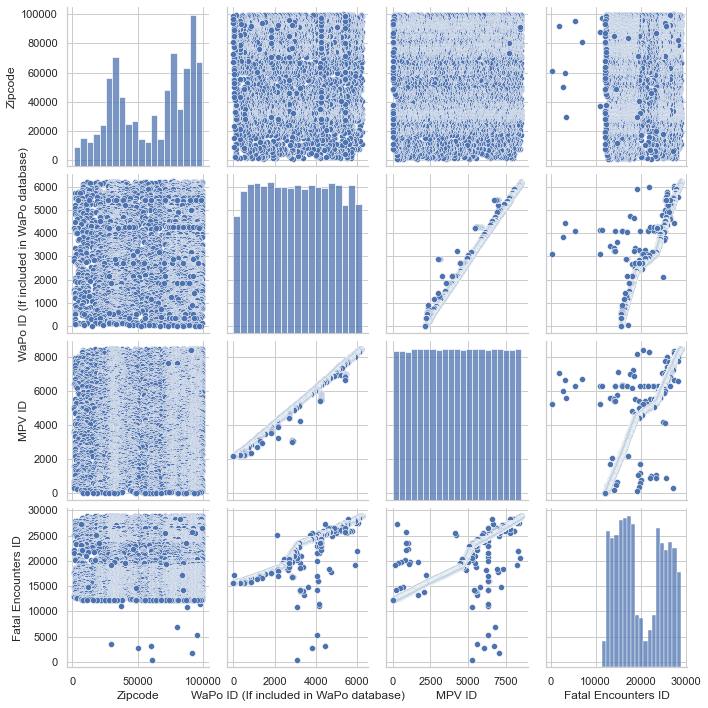

In [5]:
sns.pairplot(data=data_mapping)


In [6]:
# do we have any null values?

data_mapping.isnull().values.any()

# where are they?

for col in data_mapping.columns:
    null_count = data_mapping[col].isnull().sum()
    print(col, ": ", null_count)

Victim's name :  0
Victim's age :  15
Victim's gender :  13
Victim's race :  4
URL of image of victim :  3939
Date of Incident (month/day/year) :  0
Street Address of Incident :  95
City :  6
State :  0
Zipcode :  42
County :  14
Agency responsible for death :  16
ORI Agency Identifier (if available) :  2
Cause of death :  0
A brief description of the circumstances surrounding the death :  17
Official disposition of death (justified or other) :  11
Criminal Charges? :  0
Link to news article or photo of official document :  11
Symptoms of mental illness? :  11
Unarmed/Did Not Have an Actual Weapon :  0
Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database) :  2
Alleged Threat Level (Source: WaPo) :  2451
Fleeing (Source: WaPo) :  2893
Body Camera (Source: WaPo) :  2996
WaPo ID (If included in WaPo database) :  2915
Off-Duty Killing? :  8268
Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full

In [7]:
# drop some of the columns which have too many N/A or don't really help us

# not used and lots of missing
df1 = data_mapping.drop('URL of image of victim', axis=1)

# almost all NaN
df1 = df1.drop('Off-Duty Killing?', axis=1)

# not really used
df1 = df1.drop(['Street Address of Incident',
                'A brief description of the circumstances surrounding the death',
                "Victim's name",
                'Link to news article or photo of official document',
                'ORI Agency Identifier (if available)'],
                axis=1)

# rename a few annoying columns
df1.rename(columns={'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )':'geography'}, inplace=True)
df1.rename(columns={'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)':'Alleged Weapon'}, inplace=True)

# fix a few of the duplicate groupings

df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('unknown', 'Unknown')
df1['Symptoms of mental illness?'] = df1['Symptoms of mental illness?'].str.replace('Unkown', 'Unknown')

df1['Alleged Threat Level (Source: WaPo)'] = df1['Alleged Threat Level (Source: WaPo)'].str.replace('Other', 'other')

df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('other', 'Other')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('not fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('Not Fleeing', 'Not fleeing')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('foot', 'Foot')
df1['Fleeing (Source: WaPo)'] = df1['Fleeing (Source: WaPo)'].str.replace('car', 'Car')

df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('no', 'No')
df1['Body Camera (Source: WaPo)'] = df1['Body Camera (Source: WaPo)'].str.replace('Dashcam video', 'Dashcam Video')


#### Now see what needs further cleaning

In [8]:
for col in df1.columns:
    display(df1[col].value_counts())

25         279
31         275
27         268
Unknown    268
28         266
          ... 
88           1
93           1
7            1
40s          1
107          1
Name: Victim's age, Length: 88, dtype: int64

Male           8055
Female          425
Transgender       9
Unknown           4
Male              1
Name: Victim's gender, dtype: int64

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

6/16/2013     10
12/26/2017     9
2/1/2018       9
5/3/2020       9
1/28/2019      9
              ..
12/27/2014     1
11/3/2015      1
11/12/2015     1
7/2/2017       1
3/20/2013      1
Name: Date of Incident (month/day/year), Length: 2675, dtype: int64

Los Angeles       121
Phoenix           121
Houston           109
Chicago            84
San Antonio        66
                 ... 
Pawleys Island      1
Bass River          1
Hueytown            1
La Plata            1
Wenonah             1
Name: City, Length: 3102, dtype: int64

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
OK     236
NC     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
MI     133
SC     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
NE      39
HI      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

88001.0    11
93307.0    10
90044.0    10
87121.0    10
85009.0    10
           ..
30428.0     1
78942.0     1
67132.0     1
85085.0     1
37888.0     1
Name: Zipcode, Length: 5329, dtype: int64

Los Angeles      361
Maricopa         231
Harris           136
Jefferson        124
Orange           123
                ... 
Philadephia        1
Isle of Wight      1
Geauga             1
Deaf Smith         1
Woodford           1
Name: County, Length: 1152, dtype: int64

Los Angeles Police Department                                   132
Phoenix Police Department                                       116
Los Angeles County Sheriff's Department                         101
Chicago Police Department                                        81
New York Police Department                                       79
                                                               ... 
Illinois Department of Natural Resources Conservation Police      1
Green Township Police Department, Cheviot Police Department       1
Union Township Police Department                                  1
Simpson County Sheriff's Office                                   1
Wapato Police Department                                          1
Name: Agency responsible for death, Length: 3091, dtype: int64

Gunshot                                    7833
Gunshot, Taser                              253
Taser                                       247
Vehicle                                      44
Beaten                                       31
Physical Restraint                           25
Tasered                                      18
Physical restraint                            9
Asphyxiated                                   9
Gunshot, Police Dog                           5
Other                                         5
Pepper Spray                                  4
Gunshot, Pepper Spray                         4
Taser, Physical Restraint                     2
Bean bag                                      2
Gunshot, Stabbed                              1
Taser, Pepper spray, beaten                   1
Gunshot, Beanbag Gun                          1
Baton, Pepper Spray, Physical Restraint       1
Gunshot, Unspecified Less Lethal Weapon       1
Gunshot, Bean Bag Gun                   

Pending investigation/No Known Charges                                    4862
Unreported                                                                1225
Justified                                                                  651
Pending investigation                                                      446
Justified by District Attorney                                             350
                                                                          ... 
Unjustified, Officer fired                                                   1
Charged with manslaughter and reckless discharge of firearm                  1
Charged, Convicted of reckless homicide, sentenced to 1 year in prison       1
Justified by County Prosecuting Attorney                                     1
Charged with manslaughter, acquitted                                         1
Name: Official disposition of death (justified or other), Length: 145, dtype: int64

No known charges                                                                 8361
Charged with a crime                                                               69
Charged, Acquitted                                                                 29
Charged, Mistrial                                                                   6
Charged, Charges Dropped                                                            5
Charged, Convicted                                                                  4
Charged, Convicted, Sentenced to 5 years probation.                                 2
Charged, Convicted, Sentenced to life in prison                                     2
Charged, Convicted, Sentenced to 30 years in prison                                 2
Charged, Convicted, Sentenced to 12 years in prison and 8 years in probation        1
Charged, Convicted, Sentenced to 14 years in prison                                 1
Charged, Convicted, Sentenced to 20 years in prison   

No                     5415
Yes                    1598
Unknown                1164
Drug or alcohol use     318
Unknown                   1
Name: Symptoms of mental illness?, dtype: int64

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

gun                    4432
knife                  1129
no object               888
undetermined            532
vehicle                 499
                       ... 
Stapler                   1
metal post                1
wasp spray                1
broken glass bottle       1
knife and scissors        1
Name: Alleged Weapon, Length: 170, dtype: int64

attack          3922
other           1803
undetermined     331
Name: Alleged Threat Level (Source: WaPo), dtype: int64

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

No                    4905
Yes                    592
Surveillance Video       5
Bystander Video          4
Dashcam Video            3
Surveillance video       2
Name: Body Camera (Source: WaPo), dtype: int64

3232.0    2
3784.0    2
6117.0    2
3516.0    2
4731.0    1
         ..
6020.0    1
4650.0    1
3766.0    1
3226.0    1
6144.0    1
Name: WaPo ID (If included in WaPo database), Length: 5588, dtype: int64

Suburban        4240
Urban           2287
Rural           1899
Undetermined      73
Name: geography, dtype: int64

5972.0    2
4603.0    1
4629.0    1
497.0     1
590.0     1
         ..
2906.0    1
2268.0    1
2129.0    1
1794.0    1
8448.0    1
Name: MPV ID, Length: 8484, dtype: int64

28926.0    2
24323.0    2
28921.0    2
28920.0    2
20232.0    1
          ..
25960.0    1
14498.0    1
17377.0    1
14854.0    1
28160.0    1
Name: Fatal Encounters ID, Length: 8413, dtype: int64

#### Taking a look at the victim's race

In [9]:
data_mapping["Victim's race"].value_counts()

White               3739
Black               2138
Hispanic            1467
Unknown race         863
Asian                131
Native American      119
Pacific Islander      46
Name: Victim's race, dtype: int64

#### Where are most of the events taking place?


In [10]:
display(df1["State"].value_counts())
display(df1["City"].value_counts())

CA    1312
TX     785
FL     613
AZ     376
GA     299
CO     267
WA     245
OK     236
NC     236
OH     229
MO     226
TN     201
IL     190
PA     185
NY     174
LA     167
NM     158
AL     153
NV     144
IN     141
MD     139
KY     137
VA     136
MI     133
SC     133
WI     125
OR     124
AR     117
MS     115
NJ     113
UT      94
MN      92
KS      80
WV      76
MA      58
ID      53
IA      52
MT      48
AK      47
CT      40
NE      39
HI      39
ME      34
DC      27
SD      26
WY      22
DE      21
NH      18
ND      14
VT      12
RI       6
Name: State, dtype: int64

Los Angeles       121
Phoenix           121
Houston           109
Chicago            84
San Antonio        66
                 ... 
Pawleys Island      1
Bass River          1
Hueytown            1
La Plata            1
Wenonah             1
Name: City, Length: 3102, dtype: int64

In [11]:
# your code here 



df1['Cause of death'] = df1['Cause of death'].str.replace('Tasered', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Beaten', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Baton', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Physical Restraint', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Pepper Spray, Beaten', 'Taser')
df1['Cause of death'] = df1['Cause of death'].str.replace('Taser, Pepper spray, beaten', 'Taser')

df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Police Dog', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Taser', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper Spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Pepper Spray', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Bean Bag Gun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Beanbag Gun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Beanbag Shotgun', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Stabbed', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Unspecified Less Lethal Weapon', 'Gunshot')
df1['Cause of death'] = df1['Cause of death'].str.replace('Gunshot, Vehicle', 'Gunshot')

df1['Cause of death'] = df1['Cause of death'].str.replace('Physical restraint', 'Physical Restraint')
df1['Cause of death'] = df1['Cause of death'].str.replace('Baton, Pepper Spray, Physical Restraint', 'Beaten')
df1['Cause of death'] = df1['Cause of death'].str.replace('Beaten/Bludgeoned with instrument', 'Beaten')
df1['Cause of death'] = df1['Cause of death'].str.replace('Chemical agent/Pepper spray ', 'Pepper Spray')



df1['Cause of death'].value_counts()


Gunshot                        8103
Taser                           271
Vehicle                          44
Physical Restraint               34
Beaten                           33
Asphyxiated                       9
Other                             5
Pepper Spray                      4
Bean bag                          2
Bomb                              1
Chemical agent/Pepper spray       1
Name: Cause of death, dtype: int64

In [12]:

df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 5 years probation.', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 30 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to life in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in prison and 4 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 40 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 16 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 5 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 6 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in jail, 3 years suspended', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted without parole, plus 16 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 14 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 7 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 12 years in prison and 8 years in probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 20 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 2.5 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 25 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 50 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 4 years', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted of reckless homicide, sentenced to 1 year in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 months in jail ', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 1 year in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 10 years in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 40 years to Life in prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted ', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to Life in Prison', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 3 months in jail', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Plead No Contest, Sentenced to 10 years probation', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convicted, Sentenced to 18 months', 'Charged, Convicted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Convictedin prison', 'Charged, Convicted')

df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Charges Dropped', 'Charged, Acquitted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged with a crime, Acquitted', 'Charged, Acquitted')
df1["Criminal Charges?"] = df1["Criminal Charges?"].str.replace('Charged, Mistrial, Plead Guilty to Civil Rights Charges', 'Charged, Mistrial')


display(df1["Criminal Charges?"].value_counts())

No known charges        8361
Charged with a crime      69
Charged, Acquitted        35
Charged, Convicted        35
Charged, Mistrial          7
Name: Criminal Charges?, dtype: int64

In [13]:
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].str.replace('Unknown ', 'Unknown')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].str.replace('nan', 'Unknown')
display(df1["Symptoms of mental illness?"].value_counts())

No                     5415
Yes                    1598
Unknown                1165
Drug or alcohol use     318
Name: Symptoms of mental illness?, dtype: int64

In [14]:
display(df1["Unarmed/Did Not Have an Actual Weapon"].value_counts())

Allegedly Armed                          6084
Unarmed/Did Not Have an Actual Weapon    1164
Unclear                                   697
Vehicle                                   562
Name: Unarmed/Did Not Have an Actual Weapon, dtype: int64

In [15]:
display(df1["Fleeing (Source: WaPo)"].value_counts())

Not fleeing    3770
Car             937
Foot            732
Other           175
Name: Fleeing (Source: WaPo), dtype: int64

In [16]:
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].str.replace('Surveillance video', 'Surveillance Video')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].str.replace('nan', 'Unknown')

display(df1["Body Camera (Source: WaPo)"].value_counts())

No                    4905
Yes                    592
Surveillance Video       7
Bystander Video          4
Dashcam Video            3
Name: Body Camera (Source: WaPo), dtype: int64

In [17]:

df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, aquitted', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 18 months', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with criminally negligent homicide, Acquitted', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by District Attorney/Civil suit/Pending', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County Commonwealth's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by District Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Tossed under Stand Your Ground law', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and aggravated assault', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, charges dismissed', 'Charged, Aquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of murder, Sentenced to 30 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Pending investigation/No Known Charges; Minnesota Bureau of Criminal Apprehension, Minnesota State Patrol, Anoka County Sheriff's Office, Fridley Police Department, Lino Lakes Police Department", 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of involuntary manslaugher, Sentenced to 1 year in jail, 3 years suspended', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and involuntary manslaughter, Convicted, Sentenced to Life in Prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Prosecuting Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, convicted of manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 5 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to five years probation.', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of manslaughter, Sentenced to 14 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with negligent homicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified/Civil Suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified; New York State Police investigation; Schwalm's brother offered condolences to the deputy because of his brother's illness.", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of involuntary manslaughter, Sentenced to 5 years in Prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of reckless manslaughter, Sentenced to 6 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of felony murder, Sentenced to life without parole, plus 16 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified, Officer fired', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Plead no contest, Sentenced to 10 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation/No Known Charges/No Known Charges/No Known Charges/No Known Charges/No Known Charges', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of aggravated assault, violating the oath of his office and making a false statement, Sentenced to 12 years in prison and 8 years probation ', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('unknown', 'Unknown')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges/No Known Charges', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Cleared by coroner's inquest/Civil suit/Family awarded money", 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of misdemeanor misconduct in office, Sentenced to 3 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted and malfeasance', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by external agency', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted of second-degree murder, Sentenced to 20 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Mistrial', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted ', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with first-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 3rd degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with reckless homicide, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Acquitted', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigation/No Known Charges/No Known Charges', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, possession of a firearm during the commission of a crime and violation of oath', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State's Attorney/Civil suit/Pending", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Grand jury/No bill or Cleared/Justified', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof manslaughter and attempted murder, Sentenced to 25 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof voluntary manslaughter, Sentenced to 6 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified by internal review', 'Unjustified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Charged, Mistrial declared, Pled Guilty for Violating Walter Scott's Civil Rights", 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Grand jury/No bill or Cleared', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof voluntary manslaughter, Sentenced to 3 months in jail', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degreee murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof misdemeanor reckless conduct with a firearm, Sentenced to 1 year in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree wanton endangerment', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with felony negligent homicide, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Department of Justice', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Chargess', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof aggravated manslaughter and child endangerment, Sentenced to 30 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Convicted of aggravated assault, violating the oath of his office and making a false statement, Sentenced to 12 years in prison and 8 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof manslaughter, Sentenced to 2.5 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by coroner's inquest", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Attorney General', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof Third Degree Murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter and reckless discharge of firearm', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof first-degree murder, Sentenced to life in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Fifth Judicial Circuit Solicitor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Ruled not guilty by reason of insanity', 'Charged, Acquittted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Acquittted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with homicide and felony firearm charges, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with criminal homicide, assault, and reckless endangerment', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof felony murder, Sentenced to life in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof reckless homicide, sentenced to 1 year in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Convicted of violating oath of office, Sentenced to 1 year in prison and 4 years probation', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with voluntary manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter, Plead Guilty to Involuntary Manslaughter, Sentenced to 7 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof 2nd degree manslaughter, Sentenced to 4 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Murder / Suicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degree murder or first degree manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof second-degree manslaughter and one count of official misconduct, Sentenced to five years probation.', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by State Attorney's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 50 years', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged and Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges; Snohomish County Multiagency Response Team', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges ', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with second-degree murder, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged witth 1st degree manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Dismissed in Federal Court', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree murder, armed criminal action and two counts of child endangerment, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by U.S. Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder and attemped murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Unjustified', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convicted, Sentenced to 10 years in prison', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County Prosecutor's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with involuntary manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 1st degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Pending investigaton', 'No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by County State's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Cleared by district attorney', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Special Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Administrative discipline/Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Charges Dropped', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by Solicitor's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedof second-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified/Civil suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Ruled accidental', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('No Known Charges; Georgia Bureau of Investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with homicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by outside agency/Civil suit/Family awarded money', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Prosecutor/District Attorney/Coroner)', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Accidental', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with a crime', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Solicitor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with 2nd degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Civil suit/Pending', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Cleared', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with second-degree murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Prosecutor/District Attorney/Coroner) ', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Mistrial declared', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Aquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Administrative discipline', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified's Office", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Prosecuting Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Justified by Commonwealth's Attorney", 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Found Excusable', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter, Acquitted', 'Charged, Acquitted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace("Other justified (Civilian board/Prosecutor/District Attorney/Coroner)", 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by State Attorney', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by outside agency', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by County Prosecutor', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Other justified (Civilian board/Coroner/Medical examiner) ', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Murder/suicide', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged with manslaughter', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Civil suit/Family awarded money', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by internal review', 'Justified')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Under investigation', 'Pending investigation/No Known Charges')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Charged, Convictedwith felony murder', 'Charged, Convicted')
df1['Official disposition of death (justified or other)'] = df1['Official disposition of death (justified or other)'].str.replace('Justified by Inspector General', 'Justified')




display(df1['Official disposition of death (justified or other)'].value_counts())

Pending investigation/Pending investigation/No Known Charges                          4865
Justified                                                                             1451
Unreported                                                                            1225
Pending investigation/No Known Charges                                                 460
Unknown                                                                                254
Charged, Convicted                                                                     151
Charged, Acquitted                                                                      56
Other justified (Civilian board/Coroner/Medical examiner)                               14
Charged                                                                                  9
Pending investigation/Pending investigation/Pending investigation/No Known Charges       4
Other justified (Civilian board/Prosecutor/District Attorney/Coroner)                    3

#### Let's convert all the boolean predictors

In [18]:
# group all of the charges together for now
df1["Criminal Charges?_bool"]= df1["Criminal Charges?"].apply(lambda x: 0 if x=='No known charges' else 1)

# grouping all symptoms not classified as "yes"
df1["Symptoms of mental illness?_bool"]= df1["Symptoms of mental illness?"].apply(lambda x: 1 if x=='Yes' else 0)

# grouping all 'allegedly armed' as "yes" vs all other answers
df1["Unarmed/Did Not Have an Actual Weapon_bool"]= df1["Unarmed/Did Not Have an Actual Weapon"].apply(lambda x: 1 if x=='Allegedly Armed' else 0)

# grouping all spellings of 'not fleeing'
df1["Fleeing (Source: WaPo)_bool"]= df1["Fleeing (Source: WaPo)"].apply(lambda x: 0 if x in ['Not fleeing', 'not fleeing', 'Not Fleeing'] else 1)

# grouping all spellings of 'no'
df1["Body Camera (Source: WaPo)_bool"]= df1["Body Camera (Source: WaPo)"].apply(lambda x: 0 if x in ['No', 'no'] else 1)


In [19]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Victim's age                                        8492 non-null   object 
 1   Victim's gender                                     8494 non-null   object 
 2   Victim's race                                       8503 non-null   object 
 3   Date of Incident (month/day/year)                   8507 non-null   object 
 4   City                                                8501 non-null   object 
 5   State                                               8507 non-null   object 
 6   Zipcode                                             8465 non-null   float64
 7   County                                              8493 non-null   object 
 8   Agency responsible for death                        8491 non-null   object 
 9

None

#### Some of these datatypes still need to be recast

In [20]:
# Data type conversions

# age still has some odd values
# display(data_mapping["Victim's age"].head())
df1["Victim's age"] = data_mapping["Victim's age"].fillna(0)
#print(df1["Victim's age"].str.isdigit().sum())
df1["Victim's age"]= df1["Victim's age"].apply(lambda x: x if str(x).isdigit() else 0).astype("int")


# drop a few more NaN
#df1 = df1.fillna(str(0))
df1.dropna()

# recast some of the string categories as type string
df1["Victim's gender"] = df1["Victim's gender"].astype('str')
df1["Victim's race"] = df1["Victim's race"].astype('str')
df1["City"] = df1["City"].astype('str')
df1["State"] = df1["State"].astype('str')
df1["County"] = df1["County"].astype('str')
df1["Agency responsible for death"] = df1["Agency responsible for death"].astype('str')
df1["Cause of death"] = df1["Cause of death"].astype('str')
df1["Official disposition of death (justified or other)"] = df1["Official disposition of death (justified or other)"].astype('str')
df1["Symptoms of mental illness?"] = df1["Symptoms of mental illness?"].astype('str')
df1["Unarmed/Did Not Have an Actual Weapon"] = df1["Unarmed/Did Not Have an Actual Weapon"].astype('str')
df1["Alleged Weapon"] = df1["Alleged Weapon"].astype('str')
df1["Fleeing (Source: WaPo)"] = df1["Fleeing (Source: WaPo)"].astype('str')
df1["Body Camera (Source: WaPo)"] = df1["Body Camera (Source: WaPo)"].astype('str')
df1["Alleged Threat Level (Source: WaPo)"] = df1["Alleged Threat Level (Source: WaPo)"].astype('str')
df1["geography"] = df1["geography"].astype('str')

# Add year
df1['year'] = pd.DatetimeIndex(df1['Date of Incident (month/day/year)']).year


In [21]:
df1["Victim's gender"] = df1["Victim's gender"].str.replace('nan', 'Unknown')

display(df1["Victim's gender"].value_counts())

Male           8055
Female          425
Unknown          17
Transgender       9
Male              1
Name: Victim's gender, dtype: int64

In [ ]:
# check float features
grid_features = ["Victim's age", 'Zipcode', 'WaPo ID (If included in WaPo database)', 'MPV ID', 
                 'Fatal Encounters ID','Criminal Charges?_bool', 'Symptoms of mental illness?_bool',  
                 'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool',
                 'Body Camera (Source: WaPo)_bool' ]

scatter = pd.plotting.scatter_matrix(df1[grid_features], alpha=0.4, figsize=(20,20));
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 90)

### <div class='exercise'><b>Section 2: Now look at Washington Post Data</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

    



</div>

In [ ]:
display(data_wapo.head())
display(data_wapo.describe())

#### Check Overview information about the data


In [ ]:
display(data_wapo.columns)

In [ ]:
print('Dataset shape: ', data_wapo.shape)

data_wapo.info()

In [ ]:
# do we have any null values?

data_wapo.isnull().values.any()

# where are they?

for col in data_wapo.columns:
    null_count = data_wapo[col].isnull().sum()
    print(col, ": ", null_count)

In [ ]:
# drop some of the columns which have too many N/A or don't really help us

# not really used
df2 = data_wapo.drop('name', axis=1)


In [ ]:
# Convert dae to datetime pandas value 
# https://stackoverflow.com/a/33368021/8970591
# errors=coerce -> 'if the conversion fails for any particular string then those rows are set to NaT'
# errors=raise -> then invalid parsing will raise an exception.
df2['date'] = pd.to_datetime(df2['date'], errors='raise')

In [ ]:
display(df2.columns)
sns.pairplot(data=df2)


#### Inspect data
Check value count info for all columns

In [ ]:
for col in df2.columns:
    display(df2[col].value_counts())

In [ ]:

display(df2['manner_of_death'].value_counts())

In [ ]:
pd.set_option('display.max_rows', 20)

display(df2['armed'].value_counts())
print(df2['armed'].unique())

In [ ]:
display(df2['gender'].value_counts())

In [ ]:
display(df2['threat_level'].value_counts())

### Additional population data
We also believe that population density and classifications that could be made from this information like rural or urban cities could be important in our models. So we scraped the List of United States cities by population wikipedia page to retrieve the densities of the most densely populated cities. This wikipedia page sourced their information from the United States Census Bureau. We matched the city names from our the listed incidents of the Washington Post dataset to the population density from the scraped data and added a new Population density km2 column to our dataset.

#### Reading our scraped city population data

We scraped a wikipedia entry with population densities from cities with our 100k residents. We use this to determine if our incidents happened in urban or dense areas

In [ ]:
# Use the offline reverse_geopy lubrary to match cities to the coordinates
# http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
def addCityBasedOnCoordinates(row):
    # Get coordinate values
    lat, long = row['latitude'] , row['longitude']
    
    # Null check
    if str(lat) == 'nan' or str(long) == 'nan':
        # Return original city
        return row['city']
    location_info = reverse_geocode.get((lat, long))
    return location_info['city']
    

# Save the result in a new column
df2['city_lat_long'] = df2.apply(addCityBasedOnCoordinates, axis=1)

# Inspect the results
display(df2.head())

### Population density by city name
We got the population density estimates from [SimpleMaps](https://simplemaps.com/data/us-cities). They've built this dataset from the ground up using authoritative sources such as the U.S. Geological Survey and U.S. Census Bureau.
We are going to use this data to add a city population density column to each incident.

In [ ]:
# Data from https://simplemaps.com/data/us-cities
city_df = pd.read_csv(f'{data_dir}/uscities-simplemaps.csv')
city_df.head()


### Adding the incident's city population density 
Now that we have the original city (and sometime county) and backup city names from the coordinates, we can make the cross reference on the city population density dataset. 

In [ ]:
# The average city density from each us city, needed for imputation
avg_city_dens = city_df['density'].mean()

# To store the fails for inspection
df_fails = pd.DataFrame(columns=df2.columns)

# Use the offline reverse_geopy lubrary to match cities to the coordinates
# http://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/
def addCityDensity(row):
    global df_fails
    
    # Grab values to match
    state = row['state']
    city = row['city']
    
    # Match based on STATE and city, because a lot of states have cities with the same name
    df_matches = city_df.loc[(city_df['state_id'] == state ) & (city_df['state_id'] == state ) & (city_df['city'] == city) ]
    
    # Try backup cities that were matched by coordinates
    if len(df_matches.index) == 0:
        city_xtra = row['city_lat_long']
        df_matches = city_df.loc[(city_df['state_id'] == state ) & (city_df['city'] == city_xtra) ]

    # Null check if no matched at all...
    if len(df_matches.index) == 0:
        # print(f"Could not match city: '{city}' or '{city_xtra}' so imputing average....")
        df_fails = df_fails.append(row, ignore_index=True)
        return avg_city_dens
    
    # Only happened once for a place in Florida and since the wsp doesn't have county, we impute the avg
    elif len(df_matches.index) > 1:
        # display(df_matches)
        mean_similar_matches = df_matches['density'].mean()
        match_cnt = len(df_matches.index)
        print(f"Multiple matches ({match_cnt}) for -> '{(city)} - {state}' so imputing their average: {round(mean_similar_matches, 2)}")
        return mean_similar_matches

    # Return first match
    return df_matches['density'].iloc[0]


# Save the result in a new column
df2['city_density'] = df2.apply(addCityDensity, axis=1)
amount_total =  len(df2.index)
amount_fail = len(df_fails.index)

# Output basic stats
print(f"\n{amount_fail} from the total of {amount_total} did not match any city name from the original cities and coordinates based cities")
print(f"So we have imputed the overal city density for them of: {round(avg_city_dens, 2)}\n")

# Inspect the new df and the rows which did not match
display(df2.head())
display(df_fails.head())

### Adding merging avg household income by closest coordinate match

We matches the US postal codes mapped to coordinates with the dat from [geonames](http://download.geonames.org/export/zip/)

Now we can create a new zipcode column by finding the neirest postal_code (zipcode) for the given coordinates from each shooting.
We fist tried to search the neirest location with [apply and Harversine Dinstance](https://medium.com/analytics-vidhya/finding-nearest-pair-of-latitude-and-longitude-match-using-python-ce50d62af546), but this unfortuunatley took too long. This took to long becaus each of the 4k+ indicendents need to 1 row of the 50k+ US postal codes where you also need to compare them to get the closest distance.

So we endid up using geopandas, scripy's cKDTree by first converting the lat and long coordinates from both datasets int geomerty Points inside GeoDataFrames. And then we could use all the build in functionality from these libraries, we got most of the code [from here](https://gis.stackexchange.com/a/301935). We did have to make some changes because we needed it to work with our coordinates.

In [ ]:
# Custom function to get nan stats for empty rows
def nan_row_stats(df_missing):
    # Get the rows with all null values
    idx = df_missing.index[df_missing.isnull().all(1)]
    nans = df_missing.iloc[idx]
    if len(nans) > 1:
        print("Dataframe has rows with each column value being empty")
        display(nans)
    else:
        print(f"Dataframe with {len(df_missing)} rows, does not have rows with all empty values")
        
# Custom function to get nan stats for values
def nan_vals_stats(df_missing, show_summary=False, show_rows=False):
    # Get the missing values per each column 
    missing_series = df_missing.isna().sum()

    # Concatunate each column's type so we have a better idea for imputation
    missing_types_df = pd.concat([missing_series.rename('Missing'), df_missing.dtypes.rename('Dtype')], axis=1)
    missing_types_df.sort_values(by=['Missing'], ascending=False, inplace=True)
    display(missing_types_df)
    
    # Get the column names where values are missing
    missing_colnames = missing_types_df[missing_types_df['Missing']>0].index.tolist()
    
    if len(missing_colnames) > 0:
        # Output missing column's stats for imputaiton 
        if show_summary:
            # Get the basic information of our missing columns
            display(df_missing[missing_colnames].describe())

        # Also output missing rows, needed to determine adequate imputation method
        if show_rows:
            null_data_df = df_missing[df_missing.isnull().any(axis=1)]
            display(null_data_df)
        
    return missing_colnames

In [ ]:
# Add the year column we can use to match the right df
df_wsp = df2

df_wsp['year'] = pd.DatetimeIndex(df_wsp['date']).year
display(df_wsp['year'].value_counts())

# Read our yearly census data
# Get the income data 
df_inc_2015 = pd.read_csv(f"{data_dir}/census_household_inc_median_2015.csv", encoding='utf-8')
df_inc_2016 = pd.read_csv(f"{data_dir}/census_household_inc_median_2016.csv", encoding='utf-8')
df_inc_2017 = pd.read_csv(f"{data_dir}/census_household_inc_median_2017.csv", encoding='utf-8')
df_inc_2018 = pd.read_csv(f"{data_dir}/census_household_inc_median_2018.csv", encoding='utf-8')

# Set into a dict -> Exception for file name to match, since 2019 & 2020 not available yet
inc_dict = {
    2015 : df_inc_2015,
    2016 : df_inc_2016,
    2017 : df_inc_2017,
    2018 : df_inc_2018,
    2019 : df_inc_2018,
    2020 : df_inc_2018,
}

# Validate df
df_inc_2018.head()


In [ ]:
df_inc_plotting = df_inc_2018.sort_values(by='median_household_inc', ascending=False)
df_inc_plotting.head()

In [ ]:
import geopandas as gpd
from scipy.spatial import cKDTree
from shapely.geometry import Point

# Convert to the right dfs
df_inc_small = df_inc_2018[["median_household_inc", "longitude", "latitude"]]

# Temporarely remove rows that don't have lat/long coordinates
df_wsp_no_coordinates = df_wsp.loc[df_wsp['latitude'].isnull()]
df_wsp_geo = df_wsp[pd.notnull(df_wsp['latitude'])]

# Output info
print(f"Full amount: {len(df_wsp.index)} and Amount geo wsp: {len(df_wsp_geo.index)}")


# https://gis.stackexchange.com/questions/222315/geopandas-find-nearest-point-in-other-dataframe 
def ckdnearest(gdA, gdB):
    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdf = pd.concat(
        [gdA.reset_index(drop=True), 
         gdB.loc[idx, gdB.columns == 'median_household_inc'].reset_index(drop=True),
         pd.Series(dist, name='inc_coor_dist_match')], axis=1)
    
    # Remove the geometry col after usage
    gdf.drop(columns=['geometry'], inplace=True)
    
    return pd.DataFrame(gdf)


def match_avg_inc(year, year_inc_df):
    # Grab all incidents 1 year
    wsp_year_df = df_wsp_geo.loc[df_wsp_geo['year'] == year]
    
    # https://geopandas.org/gallery/create_geopandas_from_pandas.html#from-longitudes-and-latitudes
    gdf_wsp = gpd.GeoDataFrame(
        wsp_year_df, geometry=gpd.points_from_xy(wsp_year_df.longitude, wsp_year_df.latitude))
    inc_wsp = gpd.GeoDataFrame(
        year_inc_df, geometry=gpd.points_from_xy(year_inc_df.longitude, year_inc_df.latitude))

    # Output dfs before the operation
    # display(gdf_wsp.head())
    # display(wsp_year_df.head())

    # display(ckdnearest(gdf_wsp, inc_wsp))
    return ckdnearest(gdf_wsp, inc_wsp)
    
    

In [ ]:
# To store each year's result
wsp_year_dfs = []

# Match the closest coordinates incomes to the right years
for year, year_inc_df in inc_dict.items():
    print(f"Matching income for year -> {year}")
    df_inc_year = match_avg_inc(year, year_inc_df)
    wsp_year_dfs.append(df_inc_year)
    # display(df_inc_year)
#     break
    
# Concatunate back together and sort back to original order
df_wsp_inc = pd.concat(wsp_year_dfs, axis=0)

# Add back the rows with no coordinates
df_wsp_inc = pd.concat([df_wsp_inc, df_wsp_no_coordinates], axis=0)

# Sort by data and reset the index to be normally indexed
df_wsp_inc.sort_values(by=['date'])
df_wsp_inc.reset_index(inplace=True)

# Validate that we did not loss any rows
print(f"Before amount: {len(df_wsp.index)} & end amount: {len(df_wsp_inc.index)}")
    
# Validate of each ZCTA is matched
display(df_wsp_inc)
nan_vals_stats(df_wsp_inc)

In [ ]:
# Creating income groups

def set_inc_groups(x):
    if x < 0:
        return 'none'
    elif 0 < x <= 25000:
        return '25k_less'
    elif 25000 < x < 50000:
        return '25k_50k'
    elif 50000 < x < 75000:
        return '50k_75k'
    elif 75000 < x < 100000:
        return '75k_100k'
    elif x >= 100000:
        return '100k_plus'
    
    
def set_poverty_groups(x):
    pov_threshold = 25000
    if x < 0:
        return 'none'
    elif 0 < x < pov_threshold:
        return 'low_income'
    elif x >= pov_threshold:
        return 'not_low_income'

df2['inc_group'] = df2['median_household_inc'].apply(set_inc_groups)

df2.head(20)

### Adding the 'urban' classifier

We used a simple metric of a population km2 density above 2900 to be an 'urban' city. I got the idea from:
https://medium.com/codait/got-zip-code-data-prep-it-for-analytics-7022b47652d9

But we can probably make the classification more accurate or perhaps add more classes or create our own density based classes which could perhaps by good predictors for our model

In [ ]:
# Add population density
# Classification from: https://medium.com/codait/got-zip-code-data-prep-it-for-analytics-7022b47652d9
df2 = df_wsp_inc

# Mappping
# 2 = Urban (dens >2900)
# 1 = Suburban (100< dense < 2900)
# 0 = Rural (dens < 100)

def func(x):
    if x > 2900:
        return 'urban'
    elif 100 < x <= 2900:
        return 'suburban'
    elif x <= 100:
        return 'rural'

df2['urban'] = df2['city_density'].apply(func)

df2.head()

### Adding the 'party' classifier

This project statement originated with a discussion about Black Lives Matter and other political movements. While this analysis is focuesed more on race and time distributions, the "party" classifier uses the political affiliation in different areas of the country to attempt to identify whether political viewpoints are reflected in the likelihood of police violence and the response to those events.

Used voting records over the timeframe of the data to classify by state. (Need to boil this down to County if possible)

Reference: https://www.nytimes.com/2016/08/23/upshot/50-years-of-electoral-college-maps-how-the-us-turned-red-and-blue.html


In [ ]:
# Add year
# df2['year'] = pd.DatetimeIndex(df2['date']).year

# which states are blue?
blue_states = {2012: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2013: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2014: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2015: ['CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'HI', 'IL', 'IA', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OH', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'],
               2016: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2017: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2018: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2019: ['CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'RI', 'VT', 'VA', 'WA'],
               2020: ['AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'HI', 'IL', 'ME', 'MD', 'MA', 'MI', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY', 'OR', 'PA', 'RI', 'VT', 'VA', 'WA', 'WI'] 
              }

# process
def f1(x):
    return 1 if x.State in blue_states[x.year] else 0
def f2(x):
    return 1 if x.state in blue_states[x.year] else 0

df2['party'] = df2.apply(f2, axis=1)
df1['party'] = df1.apply(f1, axis=1)

# process further
#party_df[['shootings_black', 'shootings_white', 'shootings_other', 'rate_black', 'rate_white', 'rate_other' ]] = party_df[['shootings_black', 'shootings_white', 'shootings_other', 'rate_black', 'rate_white', 'rate_other']].fillna(0)
    

display(df2.head())



#### Need to recast some of the object types as correct values

In [ ]:
# Data type conversions
# df2['name'] = df2['name'].astype('category')
df2['manner_of_death'] = df2['manner_of_death'].astype('category')
df2['armed'] = df2['armed'].astype('str')
df2['gender'] = df2['gender'].astype('str')
df2['race'] = df2['race'].astype('str')
df2['city'] = df2['state'].astype('str')
df2['threat_level'] = df2['threat_level'].astype('str')
df2['flee'] = df2['flee'].astype('str')
df2['signs_of_mental_illness'] = df2['signs_of_mental_illness'].astype('int')
df2['body_camera'] = df2['body_camera'].astype('str')
df2['is_geocoding_exact'] = df2['is_geocoding_exact'].astype('str')

# check again
df2.dtypes

### <div class='exercise'><b>Section 3: Make some Plots!</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>

In [ ]:
def plot_value_counts_barchart(df_plot, class_key, verbose=False, normalize=False,
                               is_custom=False, custom_values=None):
    # Grab the value counts, and use custom ones if needed
    # e.g. date or categroical group
    if is_custom:
        df_values = custom_values
    else:
        df_values = df_plot[class_key].value_counts(normalize=normalize)
    
    if verbose:
        display(df_values)
    
    # Create the plot ax object
    ax = df_values.plot(kind='bar', figsize=(14,8))
    
    # Set and rotate the labels for better readability 
#     ax.set_xticklabels(preds, rotation=45, direction="in", rotation_mode="anchor")
    ax.tick_params(axis='x', rotation=45, direction="in",)
    
    # Set the labels
    ax.set_xlabel(class_key.capitalize(), fontsize=18)
    ax.set_ylabel("Frequency", fontsize=18)
    
    # Create the title extenstion and then set title
    title_ext_norm = " - Normalized" if normalize == True else ""
    ax.set_title(f"Incident frequency by {class_key.capitalize()}{title_ext_norm}", fontsize=20)
    
    plt.show()

### State by state 
We see that CA, TX and FL by far have the most police indcident. If you look at the normalized (so by ratio), chart you see a more even distribution.

In [ ]:
# WSP: Get incident state counts
per_state_df = df2.groupby(["state"])

# Plot state by state count 
plot_value_counts_barchart(df2, 'state', verbose=False, normalize=False)

# Plot state by state count 
plot_value_counts_barchart(df2, 'state', verbose=False, normalize=True)

In [ ]:
# Get the population of each state from the 2019 Cencus data
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
population_summary = population_df[population_df['STATE']!=0][['NAME','POPESTIMATE2019']]
population_summary['abbrev'] = population_summary['NAME'].map(us_state_abbrev)
population_summary.set_index('abbrev',inplace=True)

In [ ]:
state_df= pd.concat([population_summary,df2['state'].groupby([df2.state]).agg('count')],axis=1).drop(index='PR')
state_df['inc_per_million'] = state_df['state']/state_df['POPESTIMATE2019']*1000000
ax = state_df.drop(columns=['NAME','POPESTIMATE2019','state']).plot(kind='bar', figsize=(14,8))
ax.tick_params(axis='x', rotation=45, direction="in",)
ax.set_xlabel("State", fontsize=18)
ax.set_ylabel("Number of Incidents per 1M Residents", fontsize=18)
ax.set_title("Incidents per 1M Residents by State", fontsize=22)
ax.legend(fontsize=18)
plt.show()

### Year by year for all incidents
There doesn't seem to be a very clear indication that the indicents grew on year to year basis 

This data was sourced at the 10th month of 2020, so 2020 could at the end of this year also be similar to the previous years

In [ ]:
# Plot state by year 
df_by_year = df2['date'].groupby([df2.date.dt.year]).agg('count')
plot_value_counts_barchart(df2, 'year', is_custom=True, custom_values=df_by_year)

### Incidents by race

This is the [original classification](https://github.com/washingtonpost/data-police-shootings):
race:

`race`:
- `W`: White, non-Hispanic
- `B`: Black, non-Hispanic
- `A`: Asian
- `N`: Native American
- `H`: Hispanic
- `O`: Other
- `None`: unknown

We want add weights the incident based on the actual amount of each race that lives in the US.

Used data [from wikipedia](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#Racial_categories):
- `W`: 0.601
- `B`: 0.134
- `A`: 0.059
- `N`: 0.013
- `H`: 0.185
- `O`: 0.008

In [ ]:
# Get weighted values
df_by_race = df2['race'].value_counts()
display(df_by_race.head())

# https://www.worldometers.info/world-population/us-population
total_pop = 331002651

# Add the weighted race values from wikipedia x populatio
race_ratios = pd.Series({
    'W': 0.601,
    'B': 0.134,
    'A': 0.059,
    'N': 0.013,
    'H': 0.185,
    'O': 0.008,
}) * total_pop

# print(race_ratios)

# Divide the indicent counts by their representation amount 
df_by_race_ratio = (df_by_race/race_ratios) * 100
display(df_by_race_ratio.head())


# Plot state by race
plot_value_counts_barchart(df2, 'race')

# Plot state by income
# df2.median_household_inc.plot.bar()
# plt.show()

# Indicent plot by ratio race in US 
df_by_race_ratio.sort_values(ascending=False, inplace=True)
plot_value_counts_barchart(df2, 'Race ratio', is_custom=True, custom_values=df_by_race_ratio)



In [ ]:
race_year_df = df2.groupby(['race','year'], as_index=False).count()
plt.figure(figsize=(14,8))
plt.plot(race_year_df[race_year_df['race']=='A']['year'],race_year_df[race_year_df['race']=='A']['id'], label='Asian')
plt.plot(race_year_df[race_year_df['race']=='B']['year'],race_year_df[race_year_df['race']=='B']['id'], label='Black')
plt.plot(race_year_df[race_year_df['race']=='W']['year'],race_year_df[race_year_df['race']=='W']['id'], label='White')
plt.plot(race_year_df[race_year_df['race']=='N']['year'],race_year_df[race_year_df['race']=='N']['id'], label='Native American')
plt.plot(race_year_df[race_year_df['race']=='H']['year'],race_year_df[race_year_df['race']=='H']['id'], label='Hispanic')
plt.plot(race_year_df[race_year_df['race']=='O']['year'],race_year_df[race_year_df['race']=='O']['id'], label='Other')
plt.plot(race_year_df[race_year_df['race']=='nan']['year'],race_year_df[race_year_df['race']=='nan']['id'], label='Unknown')
plt.xlim(2015,2020)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of Cases", fontsize=18)
plt.title("Changes in Number of Cases for All Racial Groups (2015-2020)", fontsize=22)
plt.legend(fontsize=16)
plt.show()

### Incidents by age


In [ ]:
plt.figure(figsize=(14,8))
plt.hist(df2['age'],bins=range(10,100,10))
plt.xlabel("Age", fontsize=18)
plt.ylabel("Incident Count", fontsize=18)
plt.title("Distribution of Incidents Among Age Groups", fontsize=22)
plt.show()


### Creating a mapped visualzation


#### The state of our visualizations
We create a US map so we can better inspect where these indicents occur. We only just started working with geopandas and all it's required depencies, so our visualizations are not that great yet. We do however plan to make more specific state based visualizations, which we can use to inspect where incidents most occur and determine is a precictor like 'urban' can be of importance.

#### Imputing missing coordinates
We miss about 600 latitude and longituge points from are dataset, which you can see in this notebook. So for now we did not use the rows with missing coordinates. We do however plan to impute these coordinates by the coordinates we can cross reference from each corresponding city. This means we'll have can reduce these 600 missing coordinates to 0, since no incident has a missing value for city. We plan to use [geopy](https://geopy.readthedocs.io/en/stable/) for this.

In [ ]:
# Right way to install geopands in existing conda env
# Had to do it with pip, alse needed pip install descartes
# https://stackoverflow.com/questions/34427788/how-to-successfully-install-pyproj-and-geopandas
import geopandas

# Create a new df withouth the rows that miss the required rows for mapping
df_wsp_coord_cleared = df2[df2.longitude.notnull()]

# A GeoDataFrame needs a shapely object. We use geopandas points_from_xy()
# to transform Longitude and Latitude into a list of shapely.Point
gdf = geopandas.GeoDataFrame(df_wsp_coord_cleared,
                             geometry=geopandas.points_from_xy(df_wsp_coord_cleared.longitude,
                                                               df_wsp_coord_cleared.latitude))
# Output the results for inspection
display(gdf.head())

In [ ]:
# Docs:https://geopandas.org/gallery/create_geopandas_from_pandas.html
# Other source:https://jcutrer.com/python/learn-geopandas-plotting-usmaps
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# Get the dataset for the naturalearth_lowres
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to US.
ax = world[world.name == "United States of America"].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

# Output our first simple US map
plt.show()

#### Additional Investigative visualizations

Variety of plots attempting to gain further insights into the data


In [ ]:
# your code here
print(df2.columns)

df2.groupby('year').race.value_counts().unstack(0).plot.bar()
df2.groupby('year').manner_of_death.value_counts().unstack(0).plot.bar()
df2.groupby('year').armed.value_counts().unstack(0).plot.bar()
df2.groupby('year').age.value_counts().unstack(0).plot.bar()
df2.groupby('year').gender.value_counts().unstack(0).plot.bar()
df2.groupby('year').signs_of_mental_illness.value_counts().unstack(0).plot.bar()
df2.groupby('year').threat_level.value_counts().unstack(0).plot.bar()
df2.groupby('year').flee.value_counts().unstack(0).plot.bar()

In [ ]:
# your code here

print(df1.columns)
# More groupings 
df1.groupby('year').geography.value_counts().unstack(0).plot.bar()
df1.groupby('year')["Victim's gender"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["State"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Cause of death"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Alleged Threat Level (Source: WaPo)"].value_counts().unstack(0).plot.bar()
df1.groupby('year')["Fleeing (Source: WaPo)"].value_counts().unstack(0).plot.bar()


In [ ]:
# your code here

# Calculate correlations
corr = df1.corr()
 
# Heatmap
sns.heatmap(corr)

In [ ]:
# your code here

# Calculate correlations
corr = df2.corr()
 
# Heatmap
sns.heatmap(corr)


### <div class='exercise'><b>Section 4: Initial Look at Models</b></div>
[▲ Return to contents](#Contents)

<div class='exercise'>

</div>



*This initial look at the models explores the regression specification for Modified Question #2, evaluated by racial category of police shooting victim*

In [ ]:
# For our model, we need the distribution of racial groups in each state.  
# To get this data, we downloaded a CSV file from the following URL,
# based on the 2019 estimates by the US Census Bureau.

# https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D 

In [ ]:
racial_dist_df = pd.read_csv(f'{data_dir}/raw_data.csv')
# Drop US and PR
racial_dist_df.drop(index=[0,52], inplace=True)
racial_dist_df['state'] = racial_dist_df['Location'].map(us_state_abbrev)
racial_dist_df.set_index('state',inplace=True)
racial_dist_df = racial_dist_df.replace(np.nan,0)
racial_dist_df = racial_dist_df.replace('<.01',0)
racial_dist_df['Native Hawaiian/Other Pacific Islander'] = racial_dist_df['Native Hawaiian/Other Pacific Islander'].astype(float)
racial_dist_df['other'] = racial_dist_df['Native Hawaiian/Other Pacific Islander'] + racial_dist_df['Multiple Races']
racial_dist_df = racial_dist_df.rename(columns={'White':'race_W_ratio', 'Black': 'race_B_ratio', 'Hispanic': 'race_H_ratio', 'Asian': 'race_A_ratio', 'American Indian/Alaska Native': 'race_N_ratio', 'other': 'race_O_ratio'})

In [ ]:
model_df = pd.get_dummies(data=df2[['year','race','state']], columns=['race'])
model_df = model_df.groupby(['state','year'], as_index=False).sum()
model_df['total_incidents'] = model_df.race_A + model_df.race_B + model_df.race_H + model_df.race_N + model_df.race_O + model_df.race_W + model_df.race_nan
model_df = model_df.join(population_summary['POPESTIMATE2019'], on='state')
model_df = model_df.join(racial_dist_df[['race_W_ratio','race_B_ratio','race_H_ratio','race_A_ratio','race_N_ratio','race_O_ratio']], on='state')
model_df['black_inc_per_pop'] = model_df['race_B'] / (model_df['POPESTIMATE2019'] * model_df['race_B_ratio'])
model_df['white_inc_per_pop'] = model_df['race_W'] / (model_df['POPESTIMATE2019'] * model_df['race_W_ratio'])
model_df['asian_inc_per_pop'] = model_df['race_A'] / (model_df['POPESTIMATE2019'] * model_df['race_A_ratio'])
model_df['native_inc_per_pop'] = model_df['race_N'] / (model_df['POPESTIMATE2019'] * model_df['race_N_ratio'])
model_df['hispanic_inc_per_pop'] = model_df['race_H'] / (model_df['POPESTIMATE2019'] * model_df['race_H_ratio'])
model_df['other_inc_per_pop'] = model_df['race_O'] / (model_df['POPESTIMATE2019'] * model_df['race_O_ratio'])
model_df.head(10)

In [ ]:
# your code here
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

In [ ]:
# your code here
model_black = smf.ols(formula='black_inc_per_pop ~ 1 + C(state) + C(year)', data = model_df).fit()
print(model_black.summary())

In [ ]:
# your code here
model_white = smf.ols(formula='white_inc_per_pop ~ 1 + C(state) + C(year)', data = model_df).fit()
print(model_white.summary())

In [ ]:
# your code here
model_hispanic = smf.ols(formula='hispanic_inc_per_pop ~ 1 + C(state) + C(year) ', data = model_df).fit()
print(model_hispanic.summary())

In [ ]:
# your code here
model_otherrace = smf.ols(formula='other_inc_per_pop ~ 1 + C(state) + C(year)', data = model_df).fit()
print(model_otherrace.summary())

### <div class='exercise'><b>Section 5: Extending The Models Further</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>

</div>


This section will predict race based on the WaPo dataset, using the following methodologies:

#### Models
 * Logistic Regression Baseline Model
 * Logistirc Regression Lasso Regularized Model with Cross-Validation
 * Random Forest
 * Neural Net


In [ ]:
# do we have any null values?
df2.isnull().values.any()
print("Null values in the Dataset:")

# where are they?
for col in df2.columns:
    null_count = df2[col].isnull().sum()
    print(col, ": ", null_count)
    
# Only a few missing values, lets drop those
df2 = df2.dropna()
print("\n\nModified dataframe shape after dropping NaN:")
display(df2.shape)

In [ ]:
# Preprocessing x variable
x=df2.drop(['date', 'id', 'longitude', 'latitude', 'city_lat_long', 'inc_coor_dist_match',
            'manner_of_death','armed', 'gender', 'race', 'city', 'state', 'index',
            'inc_group', 'median_household_inc', 'urban','threat_level','flee', 'body_camera', 
            'is_geocoding_exact', 'year'], axis=1)
cat_columns = df2[['manner_of_death','armed', 'gender', 'state', 'threat_level','flee',
                   'body_camera', 'is_geocoding_exact', 'year', 'race']]
cat_onehot = pd.get_dummies(data=cat_columns)
'index'
x = pd.concat([x.reset_index(drop=True), cat_onehot.reset_index(drop=True)], axis=1)

In [ ]:
# First need to redefine and split the data into train and test sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier


# initialize
test_size = 0.2
random_state=42

# set X without response or unused predictors
X = x.drop(['race_A', 'race_B', 'race_H', 'race_N', 'race_O', 'race_W', 'race_nan'], axis=1)
y = x['race_B']

display(X.head())

# Split train and test data
X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                     y, 
                                                     test_size=test_size, 
                                                     random_state = random_state,
                                                     )

print("Initial Dataframe shape: ", df2.shape)
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape, "\ny_train shape: ", y_train.shape, "\ny_test shape: ", y_test.shape)


In [ ]:
# your code here
logit = LogisticRegression(penalty="none", max_iter = 1000)
logit.fit(X_train, y_train)

logit_train_accuracy = logit.score(X_train,y_train)
logit_test_accuracy = logit.score(X_test,y_test)

print(f"The train accuracy is {logit_train_accuracy:.2f}%")
print(f"The test accuracy is {logit_test_accuracy:.2f}%")

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate

Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e6, 1e10]
kfold = 5
training_error, cross_validation_error, testing_error = [],[],[]

# Loop to get different model scores
for c in Cs:
    logit_lasso = LogisticRegression(C=c, penalty='l1', solver='liblinear')
    logit_lasso.fit(X_train, y_train)

    logit_lasso_train_accuracy = logit_lasso.score(X_train, y_train)
    logit_lasso_test_accuracy = logit_lasso.score(X_test, y_test)

    logit_lasso_coefficients = np.hstack(
        [logit_lasso.intercept_.reshape(-1, 1), logit_lasso.coef_]
    ).T

    #Perform cross-validation on the training data with 3 folds and get the mse_scores
    acc_score_train = cross_validate(logit_lasso, X_train, y_train, cv=kfold, scoring='accuracy')['test_score']
    train_score = logit_lasso.score(X_train, y_train)*100
    test_score = logit_lasso.score(X_test, y_test)*100
    
    #Compute the train and validation MSE
    training_error.append(train_score)
    testing_error.append(test_score)
    
    #Compute the mean of the cross validation error and store in list 
    #Remember to take into account the sign of the MSE metric returned by the cross_validate function 
    cross_validation_error.append(np.mean(acc_score_train)*100)
    
    #print(
    #"The regularization parameter C chosen by this model for each class "
    #"was:\n\n\t{}\n\n"
    #"The accuracy scores for this model are:"
    #"\n\n\tTrain\t{:.4f}\n\tTest\t{:.4f}\n"
    #.format(logit_lasso.C_, logit_lasso_train_accuracy, logit_lasso_test_accuracy)
    #)

In [ ]:
#The best degree with the highest training accuracy
max_train_acc = max(training_error)
best_train_c = Cs[training_error.index(max_train_acc)]


#The best degree with the highest testing accuracy
max_test_acc = max(testing_error)
best_test_c = Cs[testing_error.index(max_test_acc)]

#The best degree with the lowest cross-validation error
max_cross_val_acc = max(cross_validation_error)
best_cross_val_c = Cs[cross_validation_error.index(max_cross_val_acc)]

print(f"The best C-value Lasso model using training dataset is c={best_train_c}  with Accuracy of:  {max_train_acc:.2f}%")
print(f"The best C-value Lasso model using testing dataset is c={best_test_c} with Accuracy of: {max_test_acc:.2f}%")
print(f"The best C-value Lasso model using cross-validation is c={best_cross_val_c} with Accuracy of: {max_cross_val_acc:.2f}%")


# visualize results using plots
fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(range(maxdeg), validation_error, label = 'Validation error')
plt.title('Accuracy Scores vs. Lasso C Value in Race Prediction Model', fontsize=22)
#Plot the cross-validation error with labels
ax.plot(Cs, cross_validation_error, '-.', label = 'Cross-Validation error')
ax.plot(Cs, training_error, '-.', label = 'Training error')
ax.plot(Cs, testing_error, '-.', label = 'Testing error')
plt.axvline(Cs[cross_validation_error.index(max(cross_validation_error))], 0, 10, color = 'r', label = f'Max CV acc at C= {Cs[cross_validation_error.index(max(cross_validation_error))]}')

# Set the plot labels and legends
ax.set_xlabel('C Value', fontsize=18)
ax.set_ylabel('Accuracy Score [%]', fontsize=18)
ax.set_xscale('log')
ax.legend(loc = 'best', fontsize=16)
plt.show()

In [ ]:
# def get_perm_imp():
# You can use the default number of n_repeats (5) and your estimator's default scorer
# To speed up the time it takes to run your permutations, you can try setting n_jobs=-1
# to take full advantage of all of your available processor cores.
per_imp_train = permutation_importance(logit_lasso, X_train, y_train, 
                                n_repeats=5, # Default
                                scoring='accuracy',
                                n_jobs=-1, #Takes as many threads as possible
                                random_state=42)

# https://scikit-learn.org/0.22/auto_examples/inspection/plot_permutation_importance.html
len_data = len(per_imp_train.importances_mean) # Needed for negative indexing
sorted_per_imp_index = per_imp_train.importances_mean.argsort()[-10:len_data]

# Get the actual mean permutation importance values and their corresponding feature names
relat_imp_feat_names = X.columns[sorted_per_imp_index]
relat_imp_means = per_imp_train.importances_mean[sorted_per_imp_index].tolist()

# Get the plots ready
fig, ax = plt.subplots(figsize = (14,8))

y_ticks = np.arange(0, len(relat_imp_feat_names))
ax.barh(y_ticks, relat_imp_means)
ax.set_yticklabels(relat_imp_feat_names, fontsize=18)
ax.set_yticks(y_ticks)
ax.tick_params(axis="x", labelsize=16)
ax.set_xlabel("Relative Importance", fontsize=18)
ax.set_title("Training Data: Permutation Importances", fontsize=22)
fig.tight_layout()
plt.show()

In [ ]:
%%time
# your code here

# run permutation importance
perm_results = permutation_importance(logit_lasso, X_train, y_train, n_jobs=-1)

# calculate relative importance of top 10 predictors in descending order
relimp10 = np.flip(np.sort(perm_results.importances_mean)[-10:])/perm_results.importances_mean.max()

# identify indices of top 10 predictors in descending order
relimp10_idx = np.flip(np.argsort(perm_results.importances_mean)[-10:])

# identify top 10 predictor names based on sorted top 10 indices
relimp10_preds = [X_train.columns[i] for i in relimp10_idx]

In [ ]:

# plot results of top 10 predictors
fig, ax = plt.subplots(figsize=(10, 6))

plt.title(
    "Top 10 predictors by relative importance\n"
    "as identfied using \"permutation_importance\"",
    fontsize=22,
)

ax.barh(relimp10_preds[::-1], relimp10[::-1], alpha=0.5)

ax.tick_params(labelsize=12)
ax.set_xlabel("relative feature importance", fontsize=16)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.grid(':', alpha=0.4)
        
plt.tight_layout()
plt.show();

In [ ]:
imp = permutation_importance(logit_lasso, X_train, y_train, n_jobs=-1)

imp_sorted_idx = imp.importances_mean.argsort()
len_data = len(imp.importances_mean) # Needed for negative indexing


In [ ]:
#y_ticks = np.arange(0, 20)
#fig, ax = plt.subplots()
#ax.barh(y_ticks, imp.importances_mean[imp_sorted_idx[156:166]])
#ax.set_yticklabels(X_train.columns[imp_sorted_idx[156:166]])
#ax.set_yticks(y_ticks)
#ax.set_title("Logistic Lasso CV Feature Importance -- Predicting Black Victim of Police Killing")
#ax.set_ylabel('Predictor')
#ax.set_xlabel('Relative Feature Importance')
#fig.tight_layout()
#plt.show()

In [ ]:
# your code here

y_pred = logit_lasso.predict(X_train).flatten()
# initialize
x_plot = X_train['city_density']
y_plot = X_train['age']
z = y_pred

# plot results
fig = plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis')
scatter = plt.scatter(x_plot, y_plot, c=z, vmin=0, vmax=1, s=35, cmap=cm)
#plt.colorbar()
plt.title('Prediction using City Density and Age, Top 2 Predictors', fontsize=18)
plt.ylabel('Predictor variable: Age', fontsize=18)
plt.xlabel('Predictor variable: City Density', fontsize=18)
plt.tick_params(labelsize=16)
plt.legend(*scatter.legend_elements(), loc='best', fontsize=16)
plt.show()


In [ ]:
depths = list(range(1, 40))

def calc_meanstd(X_train, y_train, depths):
    # your code here
    
    # initialize
    cvmeans, cvstds, train_scores, cv_scores= [], [], [], []
    
    # fit basic decision tree for each depth
    for d in depths:
        dtree = RandomForestClassifier(max_depth=d)
        dtree.fit(X_train,y_train)
    
        # training accuracy scores
        score = dtree.score(X_train, y_train)*100
        train_scores.append(score)
    
        # now check cross validation score
        kfold = 5 
        cv_score = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring='accuracy')*100

        
        # create lists for mean and stddev
        cvmeans.append(cv_score.mean())
        cvstds.append(cv_score.std())
    
    # set as nparrays for future use
    cvmeans = np.array(cvmeans)
    cvstds = np.array(cvstds)
    
    # end of your code here
    return cvmeans, cvstds, train_scores

cvmeans, cvstds, train_scores= calc_meanstd(X_train, y_train, depths)

# now plot
fig = plt.figure(figsize=(12,8))
plt.plot(depths, cvmeans, '*-', label="CV Acc")
plt.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.3, label='CV +/- 2SD')
ylim = plt.ylim()
plt.plot(depths, train_scores, '-+', label="Train Acc")
plt.vlines(20, 70, 90, color = 'r', label = f'Best Depth')
plt.legend(fontsize=12)
plt.title("Training and Cross Validation Error for Random Forest Decision Tree Model", fontsize=18)
plt.ylabel("Accuracy [%]", fontsize=14)
plt.xlabel("Decision Tree Max Depth", fontsize=14)
plt.xticks(depths)
plt.ylim(70, 90)
plt.xlim(1, 40)
plt.show()


In [ ]:
# initialize
tree_depth = 20
#seed = 0
n_estimators = round(np.sqrt(X_train.shape[1]))

random_forest = RandomForestClassifier(max_depth=tree_depth, 
                                       #random_state=seed,
                                       max_features='sqrt',
                                       n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# scores
random_forest_train_accuracy = random_forest.score(X_train, y_train)
random_forest_test_accuracy = random_forest.score(X_test, y_test)

# print results
print(f'Random Forest Train Accuracy: {random_forest_train_accuracy:.2f}')
print(f'Random Forest Test Accuracy: {random_forest_test_accuracy:.2f}')

In [ ]:
# try neural net

# couple extra imports
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# initialize
# The number of nodes in a hidden layer
n_hidden = 10
# The number of nodes in the input layer (features)
n_input = len(X_train.columns)
# The number of nodes in the output layer
n_output = 1

# First we instantiate a Keras model
NN_model = models.Sequential(name='ANN')

# Adding Layers
NN_model.add(layers.Dense(n_hidden, 
                          activation='relu', 
                          input_shape=[n_input,], 
                          name='hidden1'))
NN_model.add(layers.Dense(n_hidden, 
                          activation='relu',  
                          name='hidden2'))

# Now add the output layer
NN_model.add(layers.Dense(n_output, 
                          activation='sigmoid',  
                          name='output'))

# initialize
epochs = 50

# Compilation
NN_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#View model summary
#display(NN_model.summary())

#Fit the model on the training data
history_NN = NN_model.fit(X_train.values, 
             y_train.values, 
             epochs=epochs,
             verbose=0,
             validation_split=0.2)

# evaluate
NN_train_accuracy = NN_model.evaluate(X_train.values,y_train.values)[1]
NN_test_accuracy = NN_model.evaluate(X_test.values,y_test.values)[1]

# print results
print(f'\nThe training set accuracy for the model is: {NN_train_accuracy:.2f}%')
print(f'The test set accuracy for the model is: {NN_test_accuracy:.2f}%')

In [ ]:
# plot train and val acc as a function of epochs
# your code here
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Train and Validation Loss as Function of Epochs - Neural Network Model Predicting Black Victim of Police Killing")
plt.semilogy(history_NN.history['loss'], label='Train Loss', color='#FF9A98')
plt.semilogy(history_NN.history['val_loss'],  label='Validation Loss', color='#75B594')
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

In [ ]:
display(history_NN.history)

In [ ]:
# plot train and val acc as a function of epochs

# your code here
fig, ax = plt.subplots(1,2,figsize = (16,8))
ax[0].plot(history_NN.history['loss'], 'g', alpha=0.5, label='Training Loss')
ax[0].plot(history_NN.history['val_loss'], 'darkblue', alpha=0.5, label='Validation Loss')
ax[1].plot(history_NN.history['acc'], 'g', alpha=0.5, label='Training Accuracy')
ax[1].plot(history_NN.history['val_acc'], 'darkblue', alpha=0.5, label='Validation Accuracy')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xlabel('Epochs', fontsize = 16)
ax[0].set_ylabel('Loss', fontsize = 16)
ax[0].set_title('Loss Function vs. Epoch', fontsize = 16)
ax[1].set_xlabel('Epochs', fontsize = 16)
ax[1].set_ylabel('Accuracy %', fontsize = 16)
ax[0].set_ylim(0,2)
ax[1].set_title('Prediction Accuracy vs. Epoch', fontsize = 18)
fig.suptitle('Neural Network Model Predicting Black Victim of Police Killing', fontsize = 22)

In [ ]:
# compare various models
acc_dict_train = {'logit': logit_train_accuracy,
                #  'polyreg3': polyreg3_train_accuracy,
                  'logit_lasso_CV': logit_lasso_train_accuracy,
                  'random_forest': random_forest_train_accuracy, 
                  'neural_network': NN_train_accuracy
                 }
acc_dict_test = {'logit': logit_test_accuracy,
                # 'polyreg3': polyreg3_test_accuracy,
                 'logit_lasso_CV': logit_lasso_test_accuracy,
                 'random_forest': random_forest_test_accuracy,
                 'neural_network': NN_test_accuracy
                 }



# Look at our projections so far
X = np.arange(len(acc_dict_train))

fig = plt.figure(figsize=(12,8))
plt.scatter(X, acc_dict_train.values(), color='darkblue', label="Train Set", s = 75)
plt.scatter(X, acc_dict_test.values(), color='green', label='Test Set', s = 75)

plt.title('Test and Train Set Accuracy Scores of Various Models Predicting Black Victim of Police Killing', fontsize=18)
plt.axvline(1, 0, 100, color = 'r', label = f'Best Test Model')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy Score [%]', fontsize=16)
plt.xticks(X, acc_dict_train.keys())
plt.tick_params(labelsize=14)
plt.ylim(0.74,0.89)
plt.legend(fontsize=16)
plt.show()

In [ ]:
# your code here
# create predicted yhat variables
yhat_logit = logit.predict_proba(X_test)[:,1]
yhat_logit_lasso = logit_lasso.predict_proba(X_test)[:,1]
yhat_rf = random_forest.predict_proba(X_test)[:,1]
yhat_NN = NN_model.predict_proba(X_test.values)

# 
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, yhat_logit)
fpr_logit_lasso, tpr_logit_lasso, thresholds_logit_lasso = roc_curve(y_test, yhat_logit_lasso)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, yhat_rf)
fpr_NN, tpr_NN, thresholds_NN = roc_curve(y_test, yhat_NN)

In [ ]:
# ROC Curve
x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr_logit,tpr_logit,label="logit")
plt.plot(fpr_logit_lasso,tpr_logit_lasso,label="logit_lasso")
plt.plot(fpr_rf,tpr_rf,label="random_forest")
plt.plot(fpr_NN,tpr_NN,label="neural_network")
plt.ylabel("True Positive Rate", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=16)
plt.tick_params(labelsize=14)
plt.title("ROC Curve for Predicting Black Victim of Police Killing Across Various Models", fontsize=18)
plt.legend(fontsize=16)
plt.show()

### <div class='exercise'><b>Section 6: Other Supporting Models and Analysis</b></div>
[▲ Return to contents](#Contents)
<div class='exercise'>

</div>


This section will investigate additional models using the Washington Post and the Mapping Police Violence datasets.

#### Models
 * Logistic Regression baseline
 * Polynomial Features (3rd order) Regression
 * Lasso Regularized Model
 * Random Forest
 * Neural Net
 
#### attempts:
1. Predict mental illness based on other WaPo predictors.
2. Predict justification of shootings with police violence predictors
3. Adjusted model for mentall illness using different predictors


#### Moving on to Predicting Mental Illness
I'm really interested in understanding how mental illness factors into these crimes and subsequent shootings.

In [ ]:
display(df2.head())

# do we have any null values?
df2_encoded = df2.copy()
df2_encoded = df2_encoded.dropna()


from sklearn.preprocessing import LabelEncoder
# preprocess categorical
cat_vars = ['manner_of_death','armed', 'gender', 'race', 'city', 'state', 'threat_level', 
            'flee', 'body_camera', 'is_geocoding_exact', 'urban', 'year', 'inc_group']

le = LabelEncoder()
mapping = {}

# Assigning numerical values and storing in another column
for var in cat_vars:
    
    # transform categorical
    df2_encoded[var] = le.fit_transform(df2_encoded[var])
    
    # verify mappings for later filtering
    mapping[var] = dict(zip(le.classes_, le.transform(le.classes_)))

# mapping?
print("Mapping:")
print(mapping)

In [ ]:
# initialize
test_size = 0.2
random_state=42
# columns
display(df2_encoded.head())
# ['id', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 
# 'threat_level', 'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact']

# set X without response or unused predictors
X = df2_encoded.drop(['id', 'date', 'city', 'signs_of_mental_illness', 'is_geocoding_exact', 'latitude', 'longitude', 'city_lat_long'], axis=1)
y = df2_encoded['signs_of_mental_illness']


# Split train and test data
X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                     y, 
                                                     test_size=test_size, 
                                                     random_state = random_state,
                                                     )

print("Initial Dataframe shape: ", df2_encoded.shape)
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape, "\ny_train shape: ", y_train.shape, "\ny_test shape: ", y_test.shape)


In [ ]:
# logistic regression model with L2 ridge regularization
logreg = LogisticRegression(penalty='l2',  
                            max_iter=2000,
                            C=1.0)

# fit on scaled training data
logreg.fit(X_train,y_train)

# Check accuracy score
logreg_train_accuracy = logreg.score(X_train, y_train)*100
logreg_test_accuracy = logreg.score(X_test, y_test)*100

# Print results
print("Ridge Model Accuracy Results:")
print(f'  Logisitic Train Accuracy: {logreg_train_accuracy:.2f}%')
print(f'  Logisitic Test Accuracy: {logreg_test_accuracy:.2f}%')

In [ ]:
# find predictors
importance = permutation_importance(logreg,
                                    X_train,
                                    y_train,
                                    n_repeats=5
                                   )

# take top 10
#importance = np.sort(importance)[:10]
cols = X.columns

# summarize feature importance
#for i,v in enumerate(importance.importances_mean):
#    print(f'Feature {i}: {cols[i]}   Score: {v:.4f}')

# plot feature importance
fig = plt.figure(figsize=(10,8))
plt.bar([x for x in range(len(importance.importances_mean))], importance.importances_mean, color='darkblue', label='all predictors')
plt.title('Logistic Regression Feature Importance', fontsize=22)
plt.xticks(np.arange(len(cols)), cols, rotation=45, horizontalalignment='right')
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Predictors', fontsize=16)
plt.tick_params(labelsize=14)
plt.legend()
plt.show()

In [ ]:
# predict using test set
y_pred_test = logreg.predict(X_test)
y_pred_wh = logreg.predict(X_test[y_test==0])
y_pred_bl = logreg.predict(X_test[y_test==1])

# get performance by class
print('\nOverall Test Set Performance')
cm1 = pd.crosstab(y_test, 
                  y_pred_test, 
                  margins=True, 
                  rownames=['Actual'], 
                  colnames=['Predicted'])
display(cm1)

In [ ]:
# Try polynomial features up to 3rd order polynomials
degree = 3

# define data
X_train_poly = PolynomialFeatures(degree=degree,
                                  include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=degree,
                                 include_bias=False).fit_transform(X_test)
# fit model
polyreg3 = LogisticRegression(penalty='none', 
                              max_iter = 5000).fit(X_train_poly, y_train)

# Check accuracy score
polyreg3_train_accuracy = polyreg3.score(X_train_poly, y_train)*100
polyreg3_test_accuracy = polyreg3.score(X_test_poly, y_test)*100

# Print results
print("Polynomial Features Logistic Regression Model Accuracy Results:")
print(f'  Logisitic Train Accuracy with 3rd Order Polynomial Features: {polyreg3_train_accuracy:.2f}%')
print(f'  Logisitic Test Accuracy with 3rd Order Polynomial Features: {polyreg3_test_accuracy:.2f}%')

In [ ]:
# Try Regularized Model
# Best model based on cross validation accuracy
c = 1

# generate model
logit_lasso = LogisticRegression(C=c, 
                                 penalty='l1', 
                                 solver='saga', 
                                 max_iter = 5000).fit(X_train, y_train)

#Perfromance Evaluation
logit_lasso_train_accuracy = logit_lasso.score(X_train, y_train)*100
logit_lasso_test_accuracy = logit_lasso.score(X_test, y_test)*100

# Beta Values
intercept = logit_lasso.intercept_[0]
betas = logit_lasso.coef_[0]

# Print results
print("Best (C=100) Lasso Model Estimated Coefficients:")
print(f'Intercept: {intercept:.4f}')
#for idx, val in enumerate(betas):
    #print(f'Beta {idx+1} value: {val:.4f}')
print(f'Best Lasso Train Accuracy: {logit_lasso_train_accuracy:.2f}%')
print(f'Best Lasso Test Accuracy: {logit_lasso_test_accuracy:.2f}%')

In [ ]:
# initialize
tree_depth = 10
seed = 0
n_estimators = 55

random_forest = RandomForestClassifier(max_depth=tree_depth, 
                                       #random_state=seed,
                                       max_features='sqrt',
                                       n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# scores
random_forest_train_accuracy = random_forest.score(X_train, y_train)*100
random_forest_test_accuracy = random_forest.score(X_test, y_test)*100

# print results
print(f'Random Forest Train Accuracy: {random_forest_train_accuracy:.2f}%')
print(f'Random Forest Test Accuracy: {random_forest_test_accuracy:.2f}%')

In [ ]:
# try neural net

# couple extra imports
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

# initialize
# The number of nodes in a hidden layer
n_hidden = 15
# The number of nodes in the input layer (features)
n_input = len(X_train.columns)
# The number of nodes in the output layer
n_output = 1

# First we instantiate a Keras model
NN_model = models.Sequential(name='ANN')

# Adding Layers
NN_model.add(layers.Dense(n_hidden, 
                          activation='relu', 
                          input_shape=[n_input,], 
                          name='hidden1'))
NN_model.add(layers.Dense(n_hidden, 
                          activation='relu',  
                          name='hidden2'))

# Now add the output layer
NN_model.add(layers.Dense(n_output, 
                          activation='sigmoid',  
                          name='output'))

# initialize
epochs = 200

# Compilation
NN_model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#View model summary
display(NN_model.summary())

#Fit the model on the training data
NN_model.fit(X_train, 
             y_train, 
             epochs=epochs,
             verbose=0,
             validation_split=0.2)

# evaluate
NN_train_accuracy = NN_model.evaluate(X_train,y_train)[1]*100
NN_test_accuracy = NN_model.evaluate(X_test,y_test)[1]*100

# print results
print(f'\nThe training set accuracy for the model is: {NN_train_accuracy:.2f}%')
print(f'The test set accuracy for the model is: {NN_test_accuracy:.2f}%')

In [ ]:
# compare various models
acc_dict_train = {'logreg': logreg_train_accuracy,
                  'polyreg3': polyreg3_train_accuracy,
                  'logit_lasso': logit_lasso_train_accuracy,
                  'random_forest': random_forest_train_accuracy, 
                  'neural_network': NN_train_accuracy
                 }
acc_dict_test = {'logreg': logreg_test_accuracy,
                 'polyreg3': polyreg3_test_accuracy,
                 'logit_lasso': logit_lasso_test_accuracy,
                 'random_forest': random_forest_test_accuracy,
                 'neural_network': NN_test_accuracy
                 }


# Look at our projections so far
X = np.arange(len(acc_dict_train))

fig = plt.figure(figsize=(12,8))
plt.plot(X, acc_dict_train.values(), '--.', color='g', label="Training")
plt.plot(X, acc_dict_test.values(), '--.', color='darkblue', label='Testing')
plt.title('Predicting Mental Health Issues using All Fatal Police Shooting Predictors', fontsize=20)
plt.axvline(0, 0, 100, color = 'r', label = f'Best Test Model')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy Score [%]', fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(X, acc_dict_train.keys())
plt.ylim(55,85)
plt.legend(fontsize=16)
plt.show()

### Attempt 2

#### Predicting Justification of Violence by Race 
All of the above models were marginal at best, displaying no clear relationship between predictors and race

In [ ]:
# preprocess categorical

cat_vars = ["Victim's gender","Victim's race", 'State', 'Cause of death', 
            'Official disposition of death (justified or other)', 'Criminal Charges?', 'Symptoms of mental illness?', 
            'Unarmed/Did Not Have an Actual Weapon', 'Alleged Weapon', 'Alleged Threat Level (Source: WaPo)', 
            'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)', 'geography', 'year']

le = LabelEncoder()
mapping = {}

# Assigning numerical values and storing in another column
for var in cat_vars:
    
    # transform categorical
    df1[var] = le.fit_transform(df1[var])
    
    # verify mappings for later filtering
    mapping[var] = dict(zip(le.classes_, le.transform(le.classes_)))

# mapping?
print("Mapping:")
print(mapping)

In [ ]:
# initialize
test_size = 0.2
random_state=42

# columns
# ['Victim's age', 'Victim's gender', 'Victim's race', 'Date of Incident (month/day/year)', 'City', 'State', 
#'Zipcode', 'County', 'Agency responsible for death', 'Cause of death', 
# 'Official disposition of death (justified or other)', 'Criminal Charges?', 'Symptoms of mental illness?', 
#'Unarmed/Did Not Have an Actual Weapon', 'Alleged Weapon', 'Alleged Threat Level (Source: WaPo)', 
#'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)', 
#'geography', 'MPV ID', 'Fatal Encounters ID', 'Criminal Charges?_bool', 'Symptoms of mental illness?_bool', 
#'Unarmed/Did Not Have an Actual Weapon_bool', 'Fleeing (Source: WaPo)_bool', 'Body Camera (Source: WaPo)_bool', 'year']

# set X without response or unused predictors
X = df1.drop(['Date of Incident (month/day/year)', 'City', 'Zipcode', 'County', 'Agency responsible for death', 
              'WaPo ID (If included in WaPo database)', 'MPV ID', 'Fatal Encounters ID', 
              'Official disposition of death (justified or other)'], axis=1)
y = df1['Official disposition of death (justified or other)']


# Split train and test data
X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                     y, 
                                                     test_size=test_size, 
                                                     random_state = random_state,
                                                     stratify=df1["Victim's race"]
                                                     )

print("Initial Dataframe shape: ", df1.shape)
print("X_train shape: ", X_train.shape, "\nX_test shape: ", X_test.shape, "\ny_train shape: ", y_train.shape, "\ny_test shape: ", y_test.shape)

In [ ]:
# logistic regression model with L2 ridge regularization
logreg = LogisticRegression(penalty='l2',  
                            max_iter=2000,
                            C=1.0)

# fit on scaled training data
logreg.fit(X_train,y_train)

# Check accuracy score
logreg_train_accuracy = logreg.score(X_train, y_train)*100
logreg_test_accuracy = logreg.score(X_test, y_test)*100

# Print results
print("Ridge Model Accuracy Results:")
print(f'  Logisitic Train Accuracy: {logreg_train_accuracy:.2f}%')
print(f'  Logisitic Test Accuracy: {logreg_test_accuracy:.2f}%')

In [ ]:
# find predictors
importance = permutation_importance(logreg,
                                    X_train,
                                    y_train,
                                    n_repeats=5
                                   )

# take top 10
#importance = np.sort(importance)[:10]
cols = X_train.columns

# summarize feature importance
#for i,v in enumerate(importance.importances_mean):
#    print(f'Feature {i}: {cols[i]}   Score: {v:.4f}')

# plot feature importance
fig = plt.figure(figsize=(10,8))
plt.bar([x for x in range(len(importance.importances_mean))], importance.importances_mean, color='darkblue', label='all predictors')
plt.title('Logistic Regression Feature Importance', fontsize=22)
plt.xticks(np.arange(len(cols)), cols, rotation=45, horizontalalignment='right')
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Predictors', fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [ ]:
# predict using test set
y_pred_test = logreg.predict(X_test)


# get performance by class
print('\nOverall Test Set Performance')
cm1 = pd.crosstab(y_test, 
                  y_pred_test, 
                  margins=True, 
                  rownames=['Actual'], 
                  colnames=['Predicted'])
display(cm1)

In [ ]:
# Try polynomial features up to 3rd order polynomials
degree = 3

# define data
X_train_poly = PolynomialFeatures(degree=degree,
                                  include_bias=False).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=degree,
                                 include_bias=False).fit_transform(X_test)
# fit model
polyreg3 = LogisticRegression(penalty='none', 
                              max_iter = 5000).fit(X_train_poly, y_train)

# Check accuracy score
polyreg3_train_accuracy = polyreg3.score(X_train_poly, y_train)*100
polyreg3_test_accuracy = polyreg3.score(X_test_poly, y_test)*100

# Print results
print("Polynomial Features Logistic Regression Model Accuracy Results:")
print(f'  Logisitic Train Accuracy with 3rd Order Polynomial Features: {polyreg3_train_accuracy:.2f}%')
print(f'  Logisitic Test Accuracy with 3rd Order Polynomial Features: {polyreg3_test_accuracy:.2f}%')

In [ ]:
# Try Regularized Model
c = 1

# generate model
logit_lasso = LogisticRegression(C=c, 
                                 penalty='l1', 
                                 solver='saga', 
                                 max_iter = 2000).fit(X_train, y_train)

#Perfromance Evaluation
logit_lasso_train_accuracy = logit_lasso.score(X_train, y_train)*100
logit_lasso_test_accuracy = logit_lasso.score(X_test, y_test)*100

# Beta Values
intercept = logit_lasso.intercept_[0]
betas = logit_lasso.coef_[0]

# Print results
print("Best (C=100) Lasso Model Estimated Coefficients:")
print(f'Intercept: {intercept:.4f}')
#for idx, val in enumerate(betas):
    #print(f'Beta {idx+1} value: {val:.4f}')
print(f'Best Lasso Train Accuracy: {logit_lasso_train_accuracy:.2f}%')
print(f'Best Lasso Test Accuracy: {logit_lasso_test_accuracy:.2f}%')

In [ ]:
# initialize
tree_depth = 10
seed = 0
n_estimators = 55

random_forest = RandomForestClassifier(max_depth=tree_depth, 
                                       #random_state=seed,
                                       max_features='sqrt',
                                       n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# scores
random_forest_train_accuracy = random_forest.score(X_train, y_train)*100
random_forest_test_accuracy = random_forest.score(X_test, y_test)*100

# print results
print(f'Random Forest Train Accuracy: {random_forest_train_accuracy:.2f}%')
print(f'Random Forest Test Accuracy: {random_forest_test_accuracy:.2f}%')

In [ ]:
# compare various models
acc_dict_train = {'logreg': logreg_train_accuracy,
                  'polyreg3': polyreg3_train_accuracy,
                  'logit_lasso': logit_lasso_train_accuracy,
                  'random_forest': random_forest_train_accuracy, 
                  #'neural_network': NN_train_accuracy
                 }
acc_dict_test = {'logreg': logreg_test_accuracy,
                 'polyreg3': polyreg3_test_accuracy,
                 'logit_lasso': logit_lasso_test_accuracy,
                 'random_forest': random_forest_test_accuracy,
                 #'neural_network': NN_test_accuracy
                 }


# Look at our projections so far
X = np.arange(len(acc_dict_train))

fig = plt.figure(figsize=(12,8))
plt.plot(X, acc_dict_train.values(), '--.', color='g', label="Training")
plt.plot(X, acc_dict_test.values(), '--.', color='darkblue', label='Testing')
plt.title('Predicting Judicial Outcome of Whether Killing Was Justified', fontsize=22)
plt.axvline(3, 0, 100, color = 'r', label = f'Best Test Model')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Accuracy Score [%]', fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(X, acc_dict_train.keys())
plt.ylim(60,85)
plt.legend(fontsize=16)
plt.show()

### Attempt 3

#### One more Model attempting to predict Mental Illness
New model using different predictors to attempt to make better predictions for mental illness

In [ ]:
races_keep = ['B']
df2['is_african_american'] = df2['race'].isin(races_keep).astype(np.int8)
df2['is_african_american'].value_counts()

df3 = df2.drop(['date', 'longitude', 'latitude', 'city',
                'index', 'id', 'state', 'inc_coor_dist_match', 
                'is_geocoding_exact','year', 'race', 'city_lat_long'], axis=1)

df3.head()

In [ ]:
nan_row_stats(df3)
nan_vals_stats(df3)

In [ ]:
# Drop null values
df4 = df3.dropna()
nan_vals_stats(df4)

In [ ]:
# Custom one hot encoding function for non numerical columns/features
def one_hot_encode(df_one_hot, cols, drop_orig = False, force_lc = False, output_stats = True):
    encoded_cols_added = 0
    amount_cols_before = len(df_one_hot.columns)
    
    for col in cols:
        dummies = pd.get_dummies(df_one_hot[col], prefix=col)
        print(f"Predictor '{col}' has {len(dummies.columns)} categories added")
        df_one_hot = pd.concat([df_one_hot, dummies], axis=1)
        encoded_cols_added += len(dummies.columns)
    
    # Drop original columns
    if drop_orig:
        df_one_hot = df_one_hot.drop(cols, axis=1)
    
    # Output changes made
    if output_stats:
        print(f"Dropped original -> {drop_orig}")
        print(f"Added {encoded_cols_added} one hot encoded cols.")
        print(f"Started with {amount_cols_before} to a total of {len(df_one_hot.columns)} columns")
    
    # Lowercase all columns if required
    if force_lc:
        df_one_hot.columns= df_one_hot.columns.str.lower()
    
    return df_one_hot

In [ ]:
# Categorical variables to process
cat_vars = ['manner_of_death','armed', 'gender', 
            'threat_level', 'flee', 'body_camera', 'urban']


# Enocde all the data
encoded_df = one_hot_encode(df4, cat_vars, drop_orig = True, force_lc = True)

# Validate data mutation and output the rest
display(encoded_df.head())

### Create model data

In [ ]:
# Grab predictors, response and stratify variable
X = encoded_df.drop('signs_of_mental_illness', axis=1)
y = encoded_df[['signs_of_mental_illness']]

# Create series to make sure is_african_american and mental_illness are stratified
# https://stackoverflow.com/a/51525992/8970591
strat_mental_health_aa = encoded_df['signs_of_mental_illness'].astype(str) + \
                         encoded_df['is_african_american'].astype(str)



# Split the data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    stratify=strat_mental_health_aa,
                                                    random_state=42)


# Lastly output the shapes for validation
print("Shape all data:")
print(encoded_df.shape)

print("\nShape X_train and y_train:")
print(X_train.shape, y_train.shape)

print("\nShape X_test and y_test:")
print(X_test.shape, y_test.shape)

In [ ]:
# Re-usable function to output the model's coefficents and intercept
def output_model_coef(model, predictors, reg_type = "Logisitc"):
    # Get the coefficient estimates
    for i in range(len(predictors)):
        if i == 0:
            print(f"{reg_type} Regression est. B0 (Intercept): {model.intercept_[0]:.4f}")

        coef_val = model.coef_.flat[i]
        print(f"{reg_type} Regression est. B{i + 1} ({predictors[i]}): {coef_val:.4f}")

In [ ]:
# Values to use
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
penalty = 'l1' # l1 -> L1 -> LASSO
solver = 'liblinear' # -> You will get warning because LASSO can only work with this solver
folds = 3

# Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it
# The default scoring option used is accuracy_score
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
logit_lasso = LogisticRegressionCV(
    Cs=Cs, cv=folds, penalty=penalty, solver='liblinear'
).fit(X_train, y_train)

# Print out the coefficient estimates
output_model_coef(logit_lasso, X.columns, "Lasso-like Logistic Regression")

# Get the classification scores
logit_lasso_train_score = logit_lasso.score(X_train, y_train) * 100
logit_lasso_test_score = logit_lasso.score(X_test, y_test) * 100

# Add a new line for better readability of the output
print("\n")

# Report the classification accuracy on train and test for this model.
print(f"Training Set Accuracy Lasso-like Logistic Regression full: {logit_lasso_train_score:.4f}%")
print(f"Testing Set Accuracy Lasso-like Logistic Regression full: {logit_lasso_test_score:.4f}%")

In [ ]:
# Custom function to visualize importance predictors
def preds_importance_barchart(lasso_coef, preds):
    # Create a bar chart to visualize importance of our scaled predictors
    fig, ax = plt.subplots(figsize = (14,6),facecolor='w')

    ax.bar(np.arange(lasso_coef.size), lasso_coef)
    ax.set_xticks(np.arange(len(preds)))
    ax.set_xticklabels(preds,  rotation=45, ha="right", rotation_mode="anchor")

    # Add the labelsb
    ax.set_title('Importance bar chart standadized Lasso-like Logistic Regression full',fontsize= 15)
    ax.set_xlabel('Beta est.', fontsize=15)
    ax.set_ylabel('Predictor', fontsize=15)
    

    
# Grab the coefficients
lasso_coef = logit_lasso.coef_[0]
preds_importance_barchart(lasso_coef, X.columns)

In [ ]:
# You can use the default number of n_repeats (5) and your estimator's default scorer
# To speed up the time it takes to run your permutations, you can try setting n_jobs=-1
# to take full advantage of all of your available processor cores.
per_imp_train = permutation_importance(logit_lasso, X_train, y_train, 
                                n_repeats=5, # Default
                                scoring='accuracy',
                                n_jobs=-1, #Takes as many threads as possible
                                random_state=42)

# https://scikit-learn.org/0.22/auto_examples/inspection/plot_permutation_importance.html
len_data = len(per_imp_train.importances_mean) # Needed for negative indexing
sorted_per_imp_index = per_imp_train.importances_mean.argsort()[-10:len_data]

# Get the actual mean permutation importance values and their corresponding feature names
relat_imp_feat_names = X.columns[sorted_per_imp_index]
relat_imp_means = per_imp_train.importances_mean[sorted_per_imp_index].tolist()

# Get the plots ready
fig, ax = plt.subplots(figsize = (14,8))

y_ticks = np.arange(0, len(relat_imp_feat_names))
ax.barh(y_ticks, relat_imp_means)
ax.set_yticklabels(relat_imp_feat_names)
ax.set_yticks(y_ticks)
ax.set_title("Train Permutation Importances", fontsize=20)
fig.tight_layout()
plt.show()


In [ ]:
# Get indices per race     
race_indices_c = X_test["is_african_american"] == 1
race_indices_aa = X_test["is_african_american"] == 0

# Reshape
y_train_shape = y_train.values.reshape(-1,)
y_test_shape = y_test.values.reshape(-1,)

# Match true values per race
y_test_race_c = y_test_shape[race_indices_c]
y_test_race_aa = y_test_shape[race_indices_aa]
print(y_test_race_c)
print(y_test_race_aa)


def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return (TP, FP, TN, FN)


def get_fp_race_groups(y_true, y_pred):
    # Get the values we need
    TP, FP, TN, FN = perf_measure(y_true, y_pred)
    
    # FPR -> False postive rate
    # It’s the probability that a false alarm will be raised
    # that a positive result will be given when the true value is negative.
    FPR = FP/(FP+TN)
    
    # FNR -> False negative rate -> Miss rate
    # The probability that a true positive will be missed by the test.
    FNR = FN/(FN+TP)
    
    return FPR, FNR


# https://stackoverflow.com/a/53124075/8970591
def percentage(part,whole):
    if whole == 0:
        if part == 0:
            return float("nan")
        return float("inf")
    return float(part) / float(whole)



def output_error_scores(logit, X_test_logit, logit_name=""):
    # Get the predictions
    y_test_preds = logit.predict(X_test_logit)

    # Match race based predictions
    y_pred_race_c = y_test_preds[race_indices_c]
    y_pred_race_aa = y_test_preds[race_indices_aa]

    # 2) False Positive Rate(FPR) as a percentage for the groups (*note a positive here is two_year_recid==1)
    # 3) False Negative Rate(FNR) as a percentage for the groups
    # Get both rates
    FPR_race_c, FNR_race_c = get_fp_race_groups(y_test_race_c, y_pred_race_c)
    FPR_race_aa, FNR_race_aa = get_fp_race_groups(y_test_race_aa, y_pred_race_aa)

    # Output FPR & FNR results
    print(f"Log. Regress ({logit_name}) -> False Positive Rate(FPR) Non African-American: \t{FPR_race_c}")
    print(f"Log. Regress ({logit_name}) -> False Negative Rate(FNR) Non African-American: \t{FNR_race_c} \n")
    print(f"Log. Regress ({logit_name}) -> False Positive Rate(FPR) African-American: \t{FPR_race_aa}")
    print(f"Log. Regress ({logit_name}) -> False Negative Rate(FNR) African-American: \t{FNR_race_aa} \n")

    # 4) Ratios of Error Rates:
    ratio_err_rate_FPR = percentage(FPR_race_aa,  FPR_race_c)
    ratio_err_rate_FNR = percentage(FNR_race_aa, FNR_race_c)

    # Ouput the restults
    print(f"Log. Regress ({logit_name}) -> Ratio of the FPR between African-American and Non African-American groups: \t{ratio_err_rate_FPR}")
    print(f"Log. Regress ({logit_name}) -> Ratio of the FNR between African-American and Non African-American groups: \t{ratio_err_rate_FNR}")

In [ ]:
# Report all the scores
output_error_scores(logit_lasso, X_test, logit_name="LASSO Mental health")

In [ ]:
# Get the predicted probabilities
y_pred_proba = logit_lasso.predict_proba(X_test)
y_pred_proba_race_c = y_pred_proba[race_indices_c][:,1]
y_pred_proba_race_aa = y_pred_proba[race_indices_aa][:,1]

# Create a bar chart to visualize importance of our scaled predictors
fig, ax = plt.subplots(figsize = (14,10),facecolor='w')

# Get ROC curve metrics
fpr_c, tpr_c, thresholds_c = roc_curve(y_test_race_c, y_pred_proba_race_c)
fpr_aa, tpr_aa, thresholds_aa = roc_curve(y_test_race_aa, y_pred_proba_race_aa)

# Add ROC lines to the plot
ax.plot(fpr_c, tpr_c, label='Non African-American')
ax.plot(fpr_aa, tpr_aa, label='African-American')

# Log the model's AUC for both races
print(F"Log. Regress (no race) -> AUC for Causcasian:       \t{auc(fpr_c, tpr_c)}")
print(F"Log. Regress (no race) -> AUC for African-American: \t{auc(fpr_aa, tpr_aa)}")

# Add coin flip indicator, so 50/50
x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)

# Add the labels and show the graph
ax.set_ylabel("True Positive Rate (Sensitivity)",fontsize= 15)
ax.set_xlabel("False Positive Rate (1 - Specificity)",fontsize= 15)
ax.set_title("Comparative ROC plot for 2 different races on the Test set for Log. Regress (no race)",fontsize= 20)
ax.legend()
plt.show()

### End of Notebook